In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Cleaning

1. Load the dataset
2. Make a copy of the dataset
3. Remove personal data (marked with NaN)
4. Adjust column names (from Unnamed to Other + descriptive title for the column)
5. Since 'Jewish' and 'Agnostic' account for a significant number of entries in the 'Religion-other' column, they will be updated accordingly in the dataset

In [140]:
df = pd.read_csv("data/muslim_brand_jan_2025.csv")

In [141]:
df.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,collector_type_source,...,Where do you get your news from?,Unnamed: 16,How comfortable do you feel interacting with Muslims in your community?,How often do you hear positive things about Muslims in the media?,"In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?",Gender,Age,Major US Region,Device,Household Income
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Response,Other (please specify),Response,Response,Response,NaN,NaN,NaN,NaN,NaN
1,1.187782e+11,459378525.0,01/11/2025 12:07:03 AM,01/11/2025 12:08:13 AM,NaN,NaN,NaN,NaN,6646fdd3009d2b12a6a961c1ad,smc,...,Facebook,NaN,Comfortable,Not often,No,female,30_to_44,pacific,ios_mobile,25000_to_49999
2,1.187782e+11,459378525.0,01/11/2025 12:04:36 AM,01/11/2025 12:05:30 AM,NaN,NaN,NaN,NaN,c12721cda6ded2c4644c394f16,smc,...,Facebook,NaN,Very comfortable,Not often,No,female,30_to_44,pacific,ios_mobile,50000_to_74999
3,1.187782e+11,459378525.0,01/11/2025 12:04:50 AM,01/11/2025 12:05:17 AM,NaN,NaN,NaN,NaN,edb1fa5682b8941ebdcaaff91a,smc,...,FOX News,NaN,Neutral,Not often,No,female,18_to_29,middle_atlantic,ios_mobile,50000_to_74999
4,1.187782e+11,459378525.0,01/11/2025 12:04:32 AM,01/11/2025 12:05:13 AM,NaN,NaN,NaN,NaN,bbaf8423291a363f0165fb0485,smc,...,Youtube,NaN,Neutral,I don't know,Not Sure,female,18_to_29,NaN,ios_mobile,100000_to_124999


In [142]:
jan25= df.copy()

In [143]:
jan25 = jan25.drop(columns=['Respondent ID', 'Collector ID', 'Start Date', 'End Date', 
                            'IP Address', 'Email Address', 'First Name', 'Last Name', 
                            'Custom Data 1', 'collector_type_source'])


In [144]:
jan25.columns

Index(['What is your religion?', 'Unnamed: 11',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'Unnamed: 16',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income'],
      dtype='object')

In [145]:
jan25 = jan25.iloc[1:].reset_index(drop=True)

In [146]:
jan25.rename(columns={'Unnamed: 11': 'Religion_other'}, inplace=True)

In [147]:
jan25.rename(columns={'Unnamed: 16': 'News_other'}, inplace= True)

In [148]:
jan25.loc[(jan25['What is your religion?']== 'Other (please specify)') & (jan25['Religion_other'] == 'Jewish'),\
    'What is your religion?'] = 'Jewish'

In [149]:
jan25.loc[(jan25['What is your religion?']== 'Other (please specify)') & (jan25['Religion_other'] == 'Jewish'),\
    'What is your religion?'] = 'Jewish'

In [150]:
jan25['Religion_other'] = jan25['Religion_other'].replace(
    to_replace=r'(?i)^agnostic$',  # Case-insensitive regex for "Agnostic"
    value='Agnostic',
    regex=True
)

In [151]:
jan25.loc[(jan25['What is your religion?']== 'Other (please specify)') & (jan25['Religion_other'] == 'Agnostic'),\
          'What is your religion?']= "Agnostic"

# 2. Metrics

## 2.1 Sentiment Proportion

In [152]:
c_df = jan25['How do you feel about Muslim people in America?'].value_counts(normalize=True).reset_index()
c_df.columns = ['Category', 'Percentage']
c_df['Percentage'] *= 100  

In [153]:
c_df

,Category,Percentage
0,Good,49.549550
1,Neutral,45.945946
2,Bad,4.504505


In [154]:
print( "Good sentiment:", c_df.loc[0,'Percentage'])
print( "Neutral sentiment:", c_df.loc[1,'Percentage'])
print( "Bad sentiment:", c_df.loc[2,'Percentage'])

Good sentiment: 49.549549549549546
Neutral sentiment: 45.94594594594595
Bad sentiment: 4.504504504504505


## 2.2 Positive to Negative Ratio

In [155]:
ratio = jan25['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_negative_ratio = ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[2,'How do you feel about Muslim people in America?']

In [156]:
ratio

,index,How do you feel about Muslim people in America?
0,Good,55
1,Neutral,51
2,Bad,5


In [157]:
positive_to_negative_ratio

11.0

## 2.3 Positive to Neutral Ratio

In [158]:
p_ne_ratio = jan25['How do you feel about Muslim people in America?'].value_counts().reset_index()
positive_to_neutral_ratio = p_ne_ratio.loc[0,'How do you feel about Muslim people in America?']/\
ratio.loc[1,'How do you feel about Muslim people in America?']

In [159]:
positive_to_neutral_ratio

1.0784313725490196

# Function 1: Plotting Distributions (%)

In [160]:
def plot_percentages(df, column_name, x_label, title):
    """
    Creates a bar plot of the percentage distribution of categories in a column.
    Highlights the largest percentage in red and the rest in grey.
    """
    
    counts_df = df[column_name].value_counts(normalize=True).reset_index()
    counts_df.columns = ['Category', 'Percentage']
    counts_df['Percentage'] *= 100  # Convert to percentage

    max_index = counts_df['Percentage'].idxmax()
    colors = ['grey' if i != max_index else 'red' for i in range(len(counts_df))]
    
    plt.figure(figsize=(8.5, 5.5), dpi=150)
    sns.barplot(x='Category', y='Percentage', data=counts_df, palette=colors)


    plt.title(title, fontsize=10)
    plt.xlabel(x_label, fontsize=8)
    plt.ylabel('% Responses', fontsize=8)

    plt.xticks(rotation=45, ha='right', fontsize=7)
    plt.yticks(rotation=45, ha='right', fontsize=7)

    plt.tight_layout()
    plt.show()


# Function 2: Plotting Sentiment Breakdown (Good, Neutral, Bad)

In [161]:
def plot_stacked_bar_chart(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View'):
    """
    Plots a stacked bar chart with percentages based on the grouping of two columns, 
    one for categories (e.g., education or religion)
    and the other for sentiments.
    """
    
    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral':'#d1cfcf'
    }
    
    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), \
                                 color=[colors[col] for col in grouped_percentage.columns])
    # Add percentage annotations
    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0:  # Only annotate non-zero segments
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        # Position the text in the center of the segment
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)


    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Position the legend outside the plot
    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.figure(figsize=(9, 5), dpi=800)
    plt.show()

# Function 3: Plotting Comfort Levels (%)

In [162]:
def plot_comfort (df, category_col, comfort_level, title, xlabel, ylabel): 
    
    grouped = df.groupby([category_col, comfort_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=comfort_level, values='percentage').fillna(0)

    comfort_colors = {
        'Very comfortable': '#17b50e',  
        'Comfortable': '#9be897',       
        'Neutral': '#e3e1e1',           
        'Uncomfortable': '#cf4229',     
        'Very uncomfortable': '#2ebf26'  
    }



    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), \
                          color=[comfort_colors.get(level) for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Comfort Level', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i, variable in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[variable, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Very comfortable' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    

    plt.show()

## Overall Sentiment and Comfort Levels Across All Participants

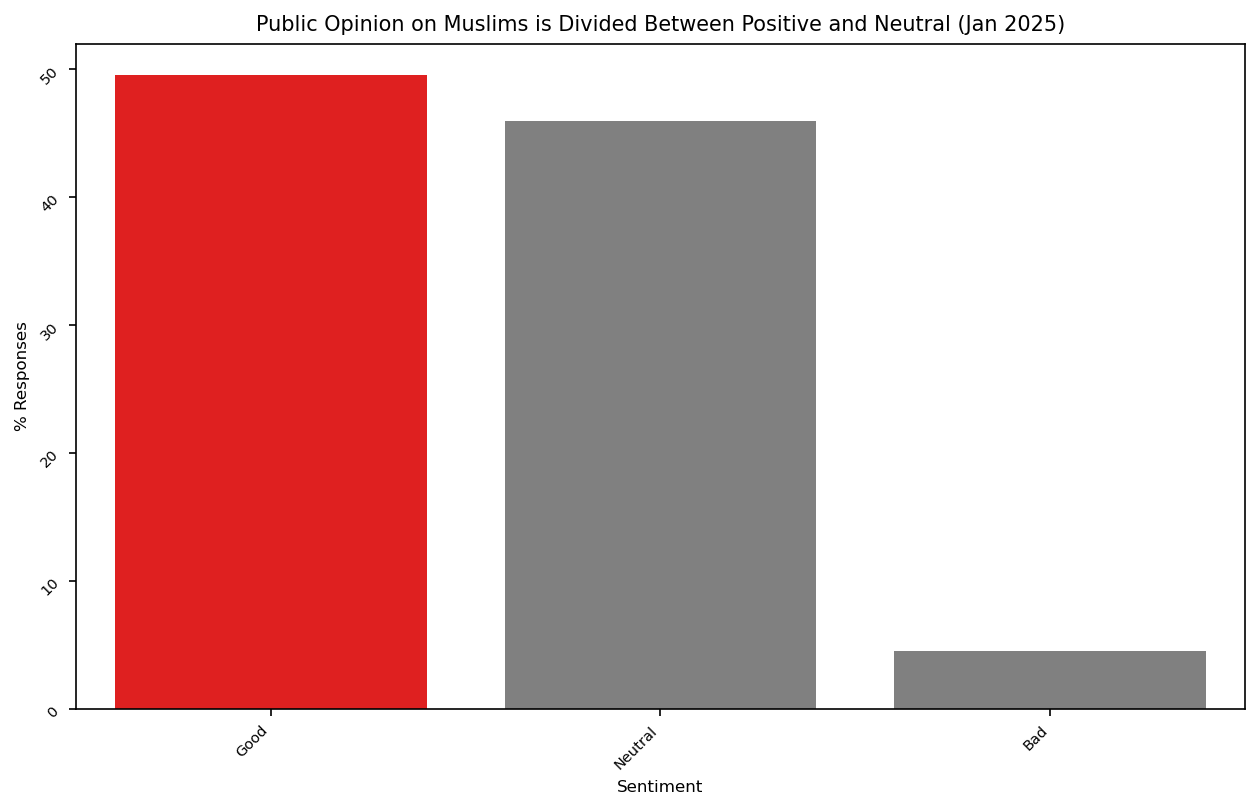

In [163]:
plot_percentages(jan25,'How do you feel about Muslim people in America?', 'Sentiment', \
                 'Public Opinion on Muslims is Divided Between Positive and Neutral (Jan 2025)')

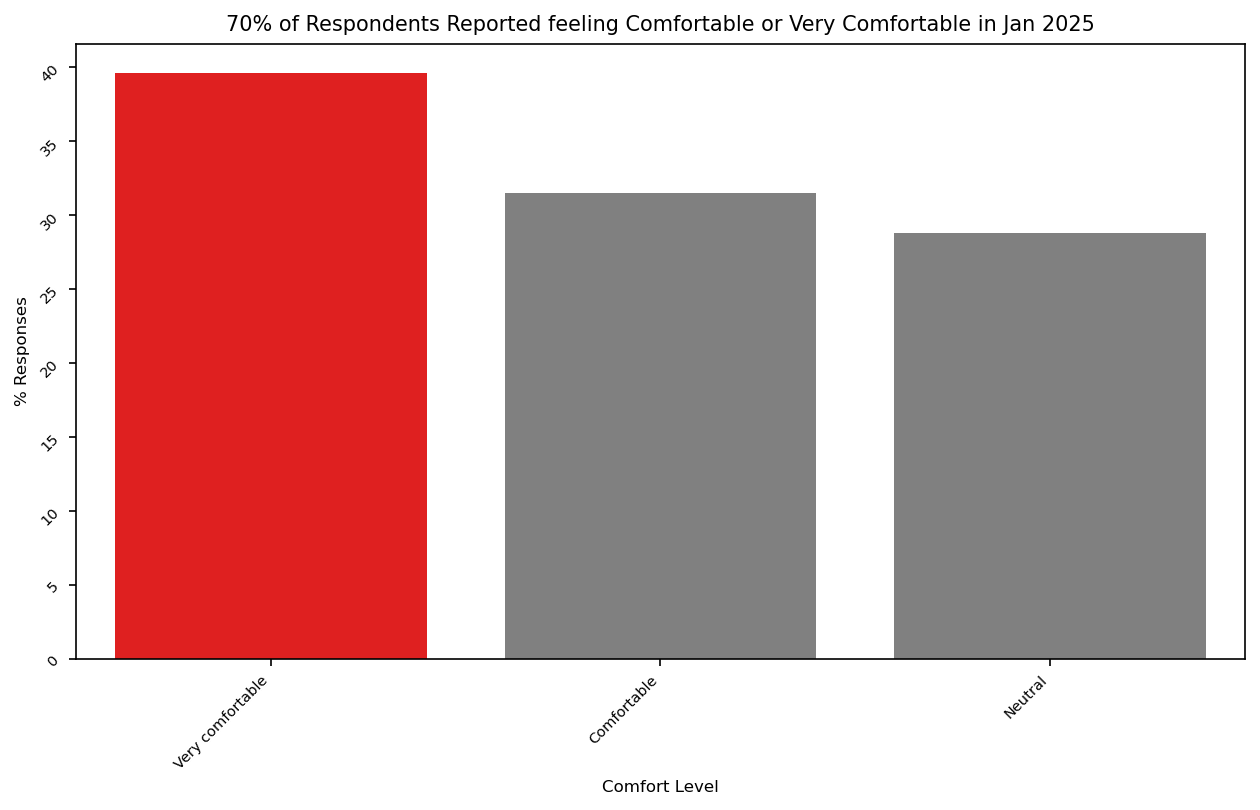

In [164]:
plot_percentages(jan25,'How comfortable do you feel interacting with Muslims in your community?', "Comfort Level",\
                "70% of Respondents Reported feeling Comfortable or Very Comfortable in Jan 2025" )

In [165]:
#15-Point Drop in "Very Comfortable" Responses from Oct 24 to Jan 25

jan25['How comfortable do you feel interacting with Muslims in your community?'].value_counts(normalize= True)

Very comfortable    0.396396
Comfortable         0.315315
Neutral             0.288288
Name: How comfortable do you feel interacting with Muslims in your community?, dtype: float64

# Distribution of Religion

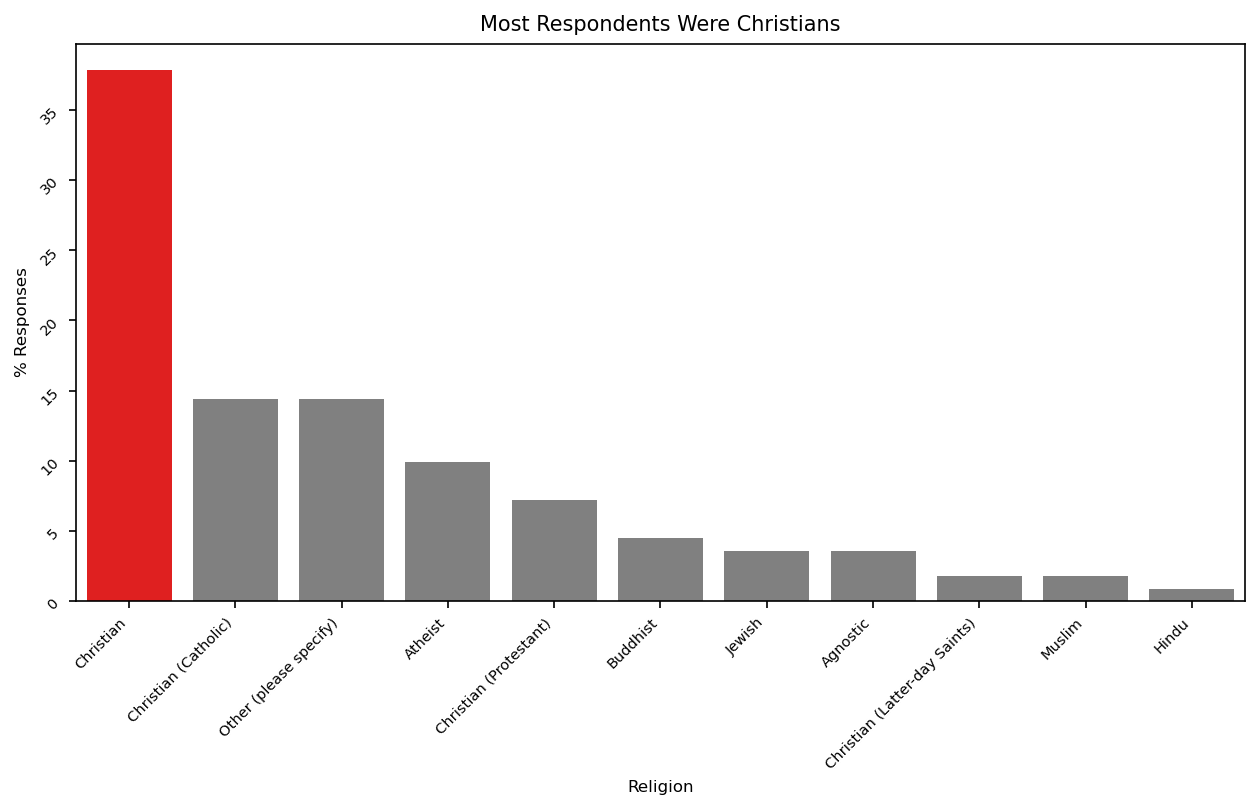

In [166]:
plot_percentages(jan25,'What is your religion?', 'Religion', 'Most Respondents Were Christians')

In [167]:
jan25['What is your religion?'].value_counts()

Christian                        42
Christian (Catholic)             16
Other (please specify)           16
Atheist                          11
Christian (Protestant)            8
Buddhist                          5
Jewish                            4
Agnostic                          4
Christian (Latter-day Saints)     2
Muslim                            2
Hindu                             1
Name: What is your religion?, dtype: int64

# Religious Differences in Attitudes Toward Muslims

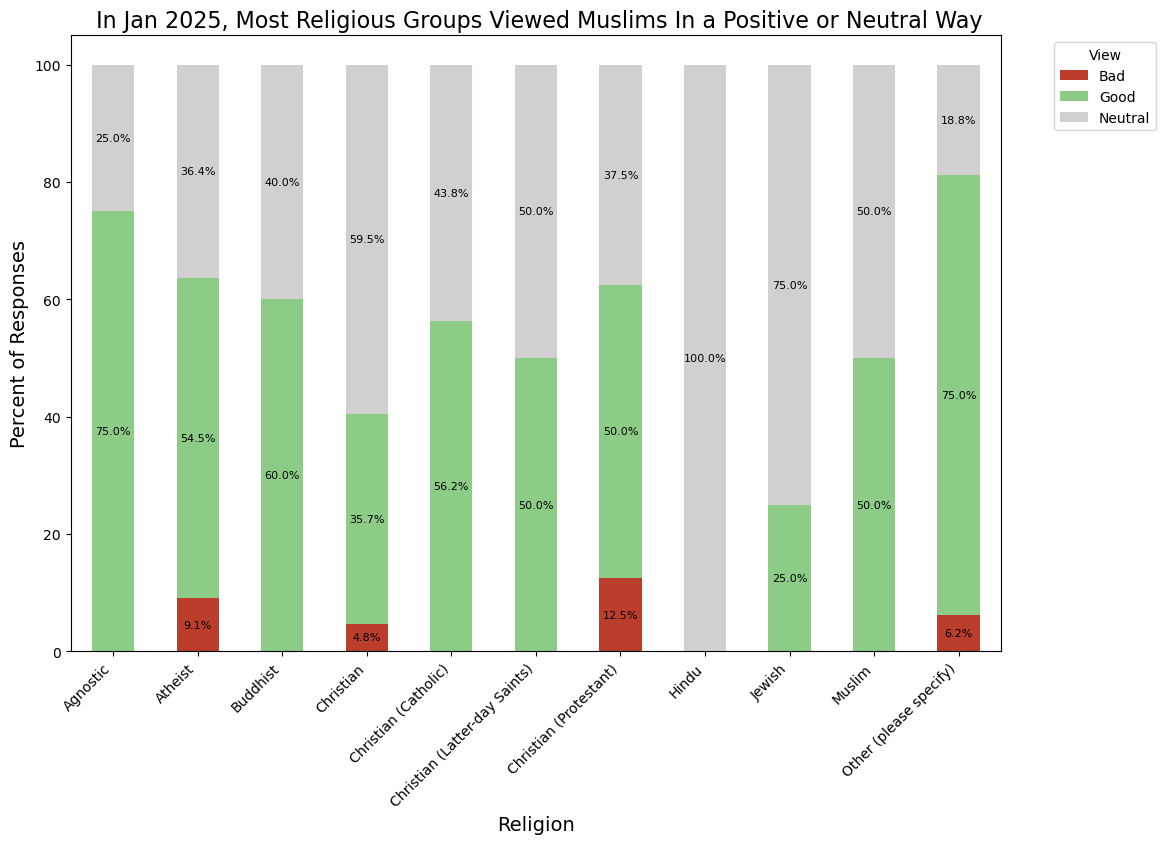

<Figure size 7200x4000 with 0 Axes>

In [168]:
plot_stacked_bar_chart(
    df=jan25,  
    title=' In Jan 2025, Most Religious Groups Viewed Muslims In a Positive or Neutral Way',
    xlabel='Religion',
    ylabel='Percent of Responses',
    cat_col='What is your religion?',
    sent_col='How do you feel about Muslim people in America?',
)

Hindus maintained a consistent sentiment toward Muslims, remaining predominantly neutral from October 2024 to January 2025. Among Jews, no negative sentiment toward Muslims was observed in January 2025; however, there was a significant decline in positive sentiment, dropping from 51.1% to 25%. A notable shift occurred in the sentiment of atheists, with positive feelings decreasing from an overwhelming 85.7% to 54.5%, and 9% expressing negative views toward Muslims

## Breakdown of Comfort level Across Different Religions

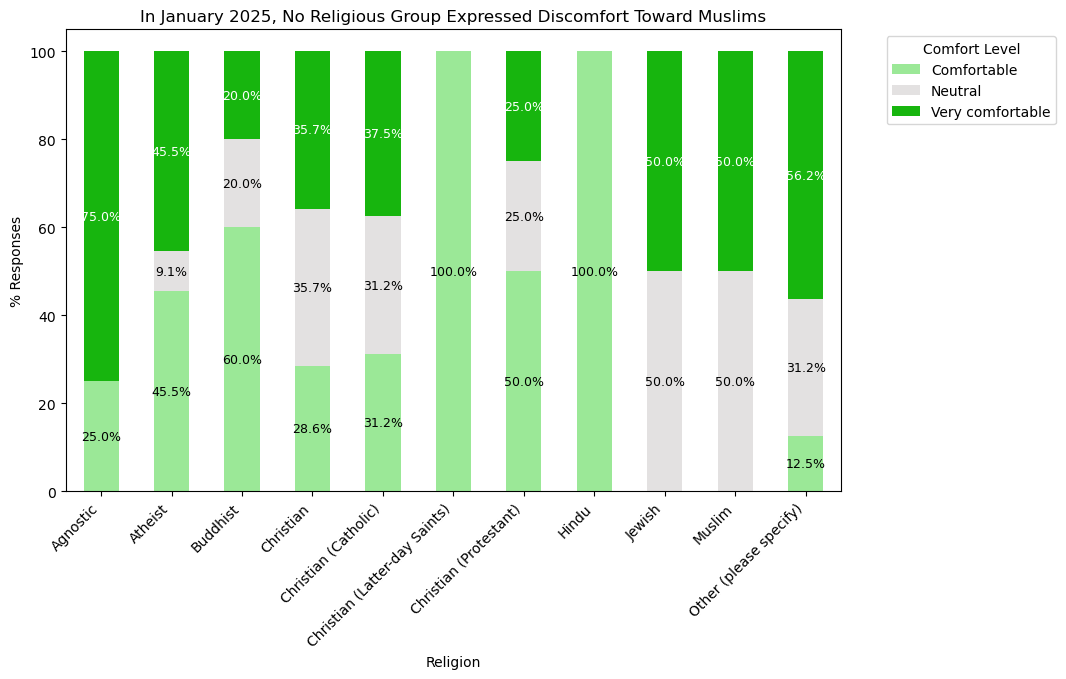

In [169]:
plot_comfort(
    df= jan25, 
    category_col= 'What is your religion?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='In January 2025, No Religious Group Expressed Discomfort Toward Muslims',
    xlabel='Religion',
    ylabel='% Responses',
)

Both Jewish and Muslim groups exhibit evenly distributed responses, with 50% feeling 'Comfortable' and 50% 'Neutral.' Consistent with the sentiment findings, where agnostics reported the highest level of positive attitudes toward Muslims, agnostics also report high levels of comfort, with 75% feeling 'Very Comfortable' and the remaining 25% feeling 'Comfortable.' Interestingly, the Hindu group, despite reporting 'Neutral' sentiments toward Muslims in America, predominantly expressed feeling 'Comfortable' in their interactions with them

# Educational Differences in Attitudes Towards Muslims

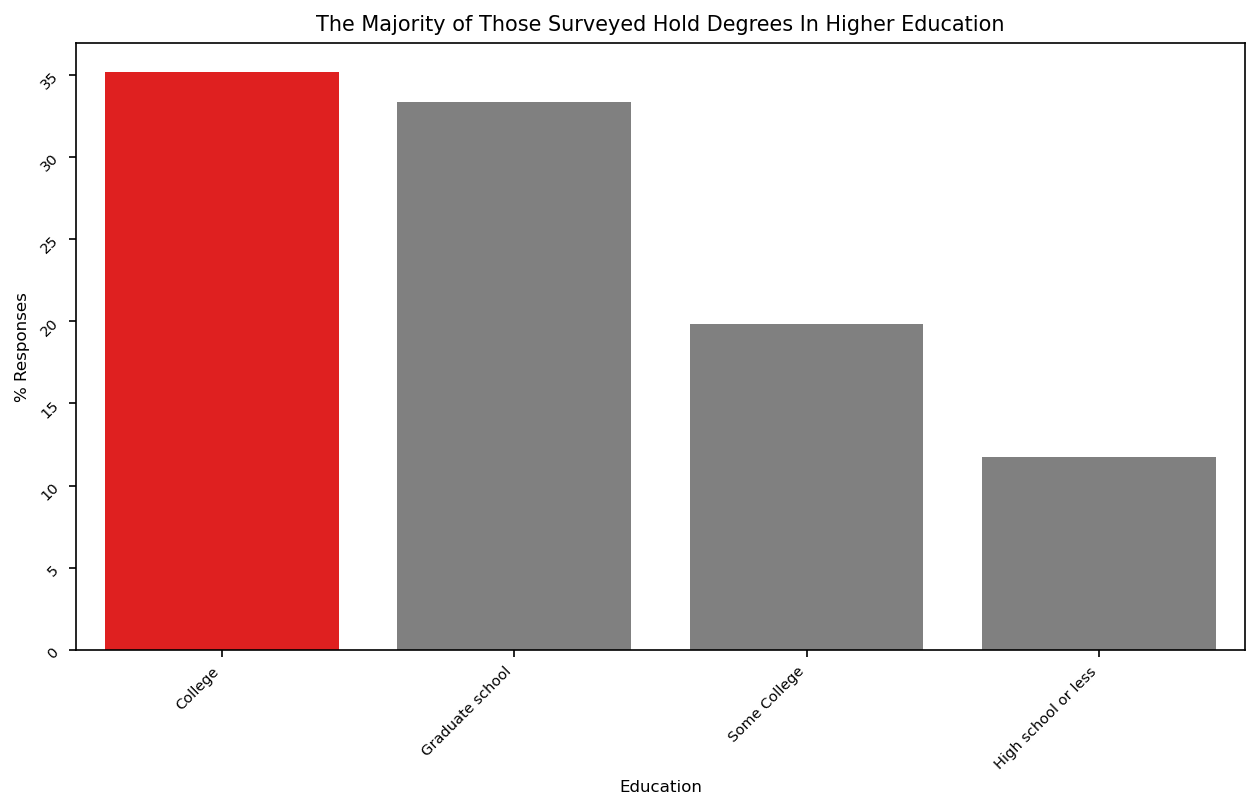

In [170]:
plot_percentages(jan25,'What is your level of education?', 'Education',
           'The Majority of Those Surveyed Hold Degrees In Higher Education')

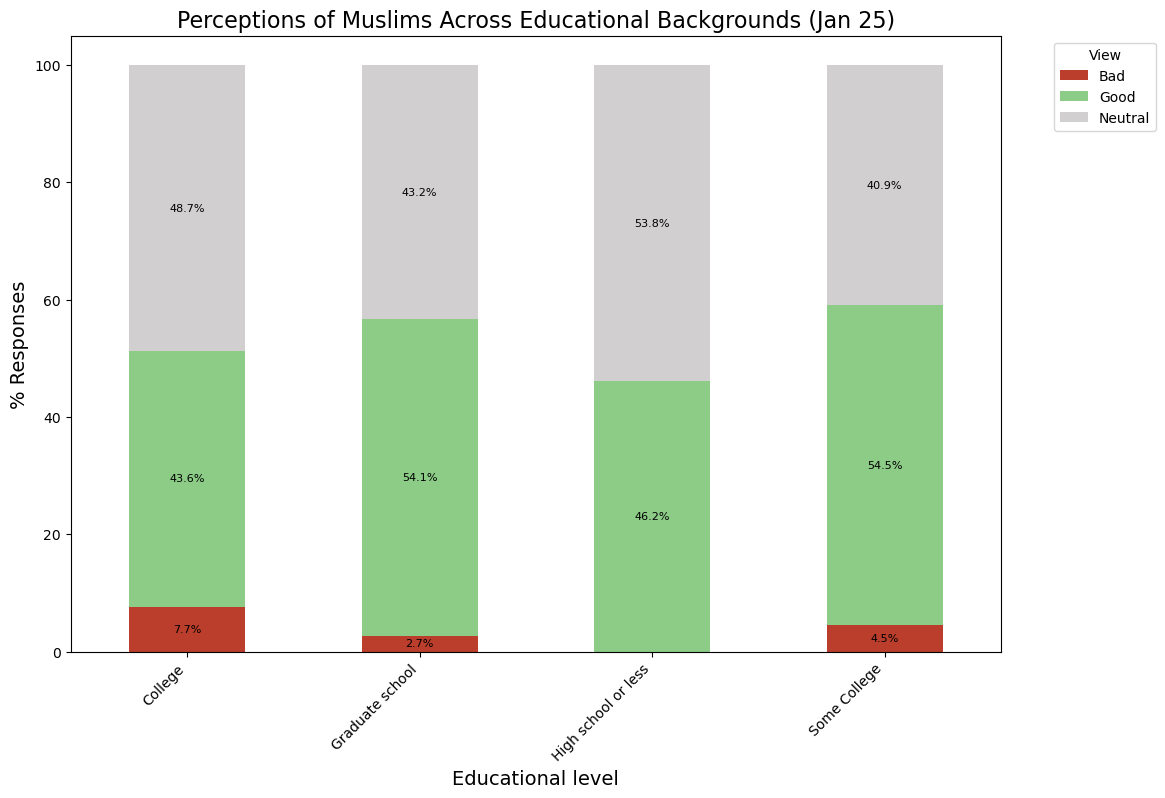

<Figure size 7200x4000 with 0 Axes>

In [171]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Perceptions of Muslims Across Educational Backgrounds (Jan 25)',
    xlabel='Educational level',
    ylabel='% Responses',
    cat_col='What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

Across all educational levels, positive perceptions decreased from October to January.Neutral views rose significantly in all groups, suggesting growing ambivalence or uncertainty.
Notably, negative perceptions among graduate and "some college" respondents declined, but negative views increased for college-educated individuals.

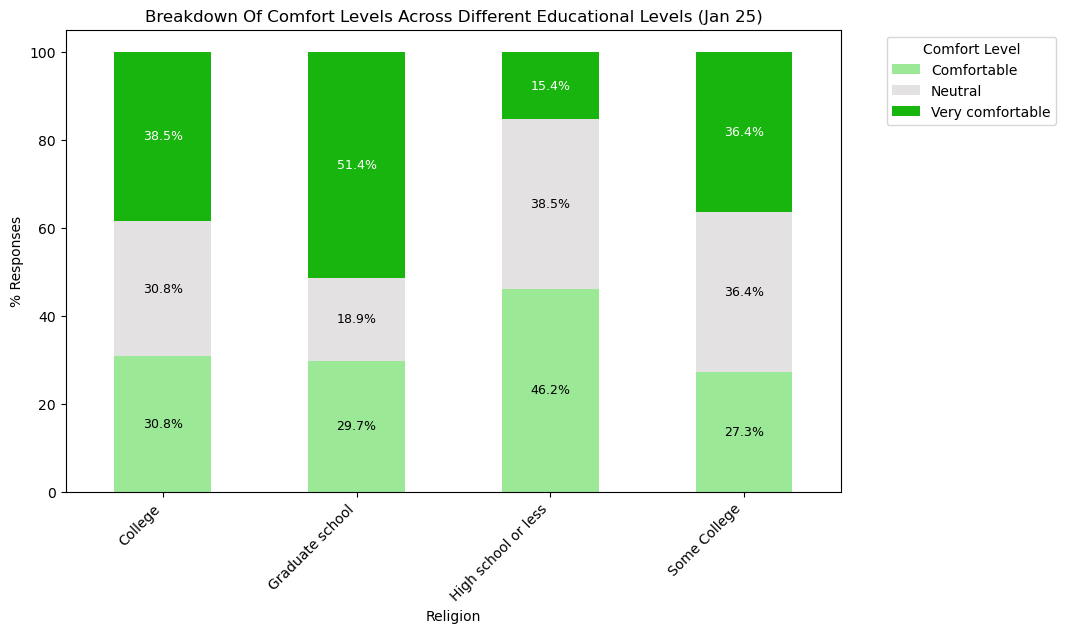

In [172]:
plot_comfort(
    df= jan25, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (Jan 25)',
    xlabel='Religion',
    ylabel='% Responses',
)

From October 2024 to January 2025, there has been a noticeable shift toward neutrality in comfort levels around Muslims across most educational backgrounds. Among the 'High School or Less' group, a significant 50-point drop was observed in those reporting their comfort level as 'Very Comfortable.

## Age Differences in Attitudes Towards Muslims

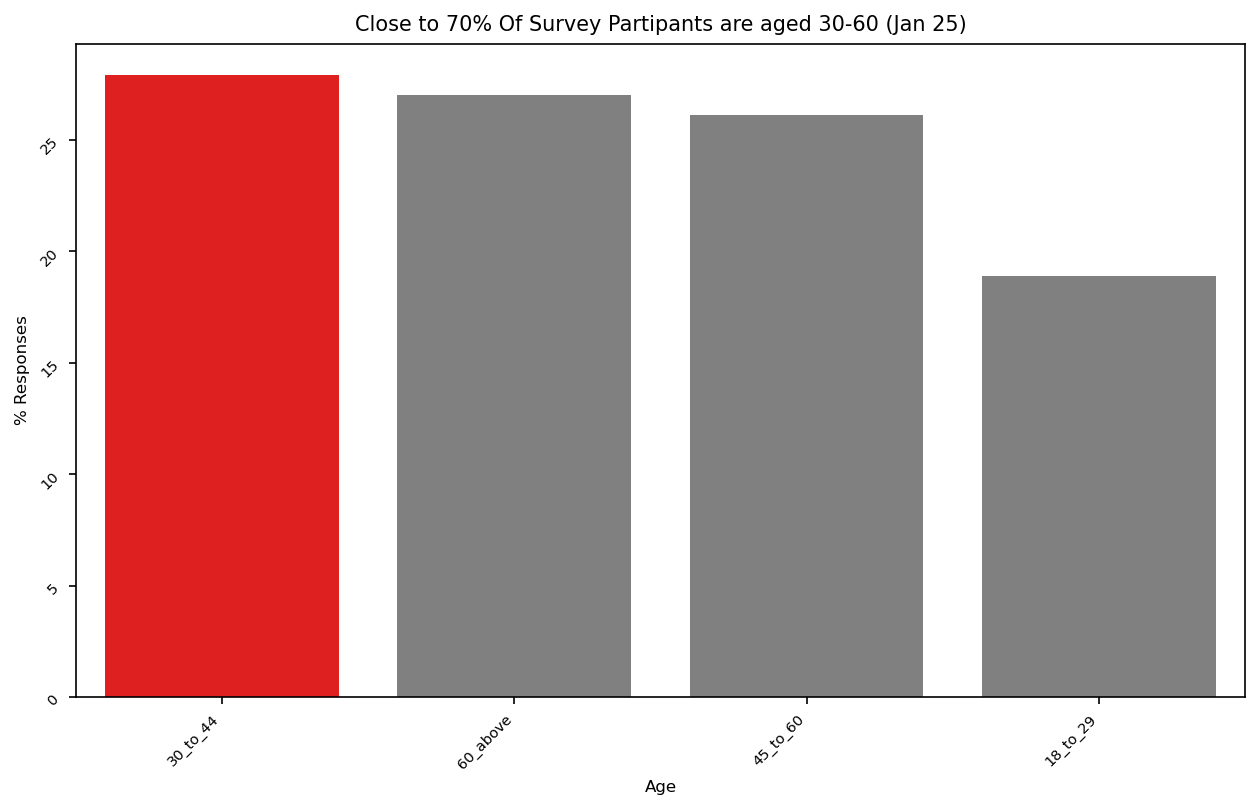

In [173]:
plot_percentages(jan25,'Age', 'Age',
           'Close to 70% Of Survey Partipants are aged 30-60 (Jan 25)')

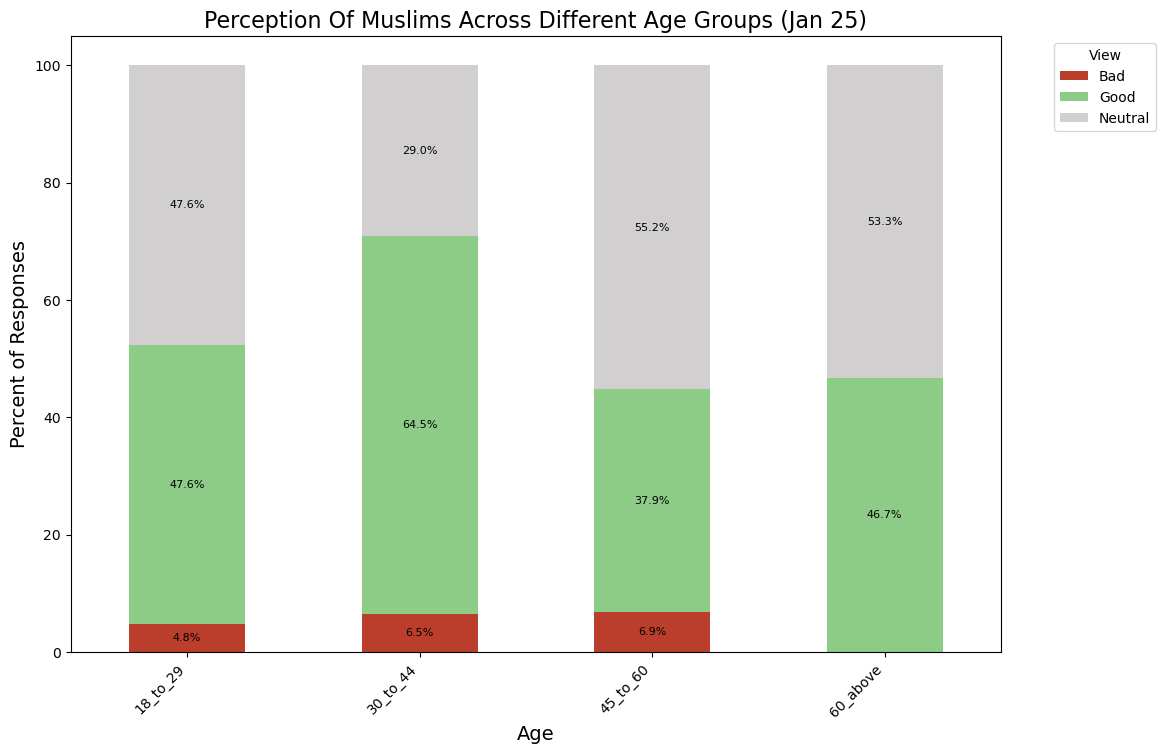

<Figure size 7200x4000 with 0 Axes>

In [174]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Perception Of Muslims Across Different Age Groups (Jan 25)',
    xlabel='Age',
    ylabel='Percent of Responses',
    cat_col='Age',
    sent_col='How do you feel about Muslim people in America?'
)

Across all age groups, there was a noticeable increase in neutral responses from October to January, particularly in the 18–29 and 45–60 age groups.

Positive perceptions generally declined across most age groups, except for the 30–44 group, which saw an increase (from 50% to 64%).
Negative views remained relatively low across all age groups, with minor increases in some groups.

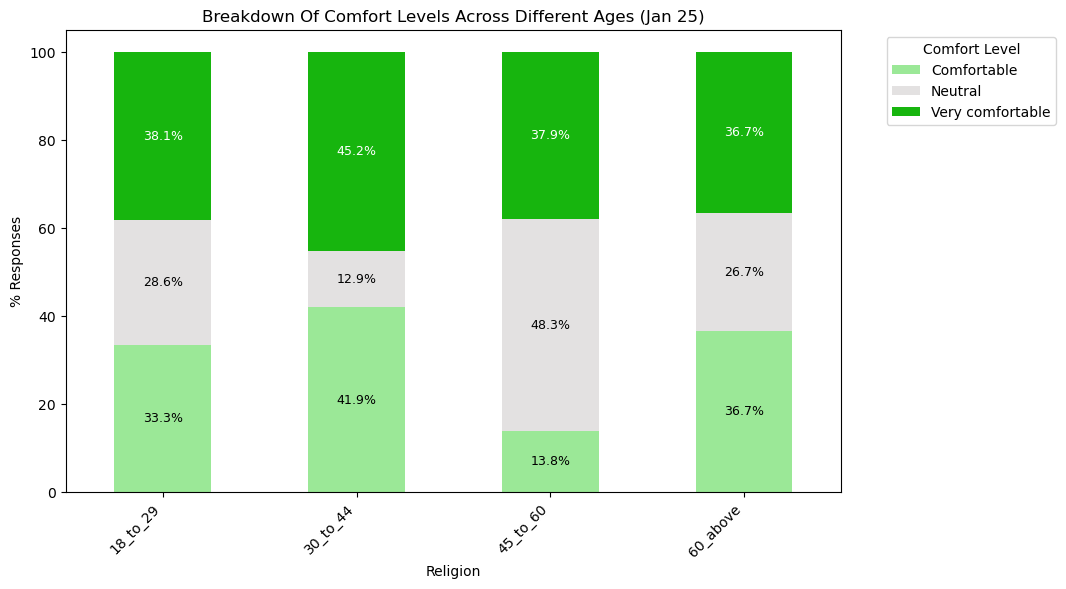

In [175]:
plot_comfort(
    df= jan25, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (Jan 25)',
    xlabel='Religion',
    ylabel='% Responses',
)

**Decline in "Very Comfortable" Responses:**

Most age groups saw a decrease in "Very Comfortable" responses from October to January, particularly among the 18–29 and 60+ groups.

**Increase in Neutrality:**

Neutral responses rose in the 18–29 and 45–60 groups, reflecting growing ambivalence or a shift away from strong comfort levels.

**Fluctuations in "Comfortable" Responses:**

The "Comfortable" category saw mixed trends: an increase in the 30–44 and 60+ groups, but a decline in the 45–60 group.

# Income-based Differences in Attitudes Towards Muslims

In [176]:
jan25['Household Income'].value_counts()

25000_to_49999      25
50000_to_74999      22
75000_to_99999      13
125000_to_149999    11
100000_to_124999    10
0_to_9999            8
no_answer            7
150000_to_174999     5
10000_to_24999       5
200000_and_up        4
175000_to_199999     1
Name: Household Income, dtype: int64

In [178]:
income_mapping = {"25000_to_49999": "25k-49k",
"50000_to_74999":"50k-74k",
"75000_to_99999": "75k-99k",
"125000_to_149999": "125k-149k",
"100000_to_124999" :"100k-124k",
"0_to_9999"        : "0-9k",
"no_answer":    "undisclosed",
"150000_to_174999":"150k-174k",
"10000_to_24999" : "10k-24k",
"200000_and_up":   "200k_up",
"175000_to_199999": "175k-199k"}

jan25['Household Income'] = jan25['Household Income'].replace(income_mapping)

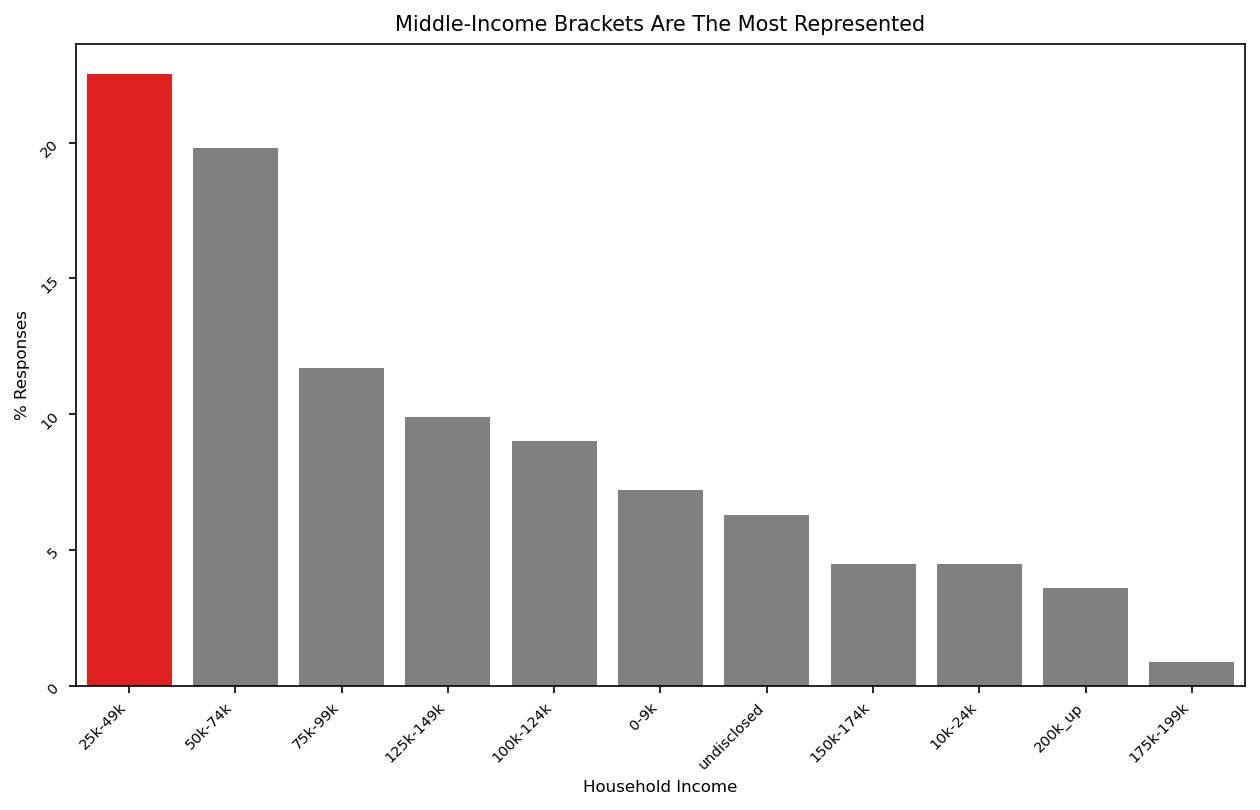

In [179]:
plot_percentages(jan25,'Household Income', 'Household Income',
           'Middle-Income Brackets Are The Most Represented')

In [180]:
jan25['Household Income'].value_counts(normalize= True)

25k-49k        0.225225
50k-74k        0.198198
75k-99k        0.117117
125k-149k      0.099099
100k-124k      0.090090
0-9k           0.072072
undisclosed    0.063063
150k-174k      0.045045
10k-24k        0.045045
200k_up        0.036036
175k-199k      0.009009
Name: Household Income, dtype: float64

In [181]:
income_brackets = {"25k-49k":"low",
"50k-74k":"mid",
 "75k-99k":"mid",
"125k-149k":"mid",
"100k-124k":"mid",
 "0-9k": "low",
"undisclosed": "undisclosed",
"150k-174k":"high",
"10k-24k":"low",
"200k_up":"high",
"175k-199k":"high"}

jan25['Household_Income'] = jan25['Household Income'].replace(income_brackets)

In [182]:
jan25['Household_Income']

0      low
1      mid
2      mid
3      mid
4      mid
      ... 
106    mid
107    mid
108    mid
109    low
110    mid
Name: Household_Income, Length: 111, dtype: object

In [183]:
def plot_income(df, title, xlabel, ylabel, cat_col, sent_col, legend_title='View', cat_order=None):


    colors = {
        'Good': '#8ccc87',
        'Bad': '#ba3e2b',
        'Neutral': '#d1cfcf'
    }

    if cat_order:
        df[cat_col] = pd.Categorical(df[cat_col], categories=cat_order, ordered=True)

    grouped = df.groupby([cat_col, sent_col]).size().unstack(fill_value=0)

    grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

    ax = grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), 
                                 color=[colors[col] for col in grouped_percentage.columns])
    

    for i, (colname, coldata) in enumerate(grouped_percentage.items()):
        for index, value in enumerate(coldata):
            if value > 0: 
                ax.text(index, 
                        grouped_percentage.iloc[:index+1, :i+1].sum(axis=1)[index] - (value / 2), 
                        f"{value:.1f}%", 
                        ha='center', 
                        va='center', 
                        color='white' if colors[colname] == 'grey' else 'black', 
                        fontsize=8)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

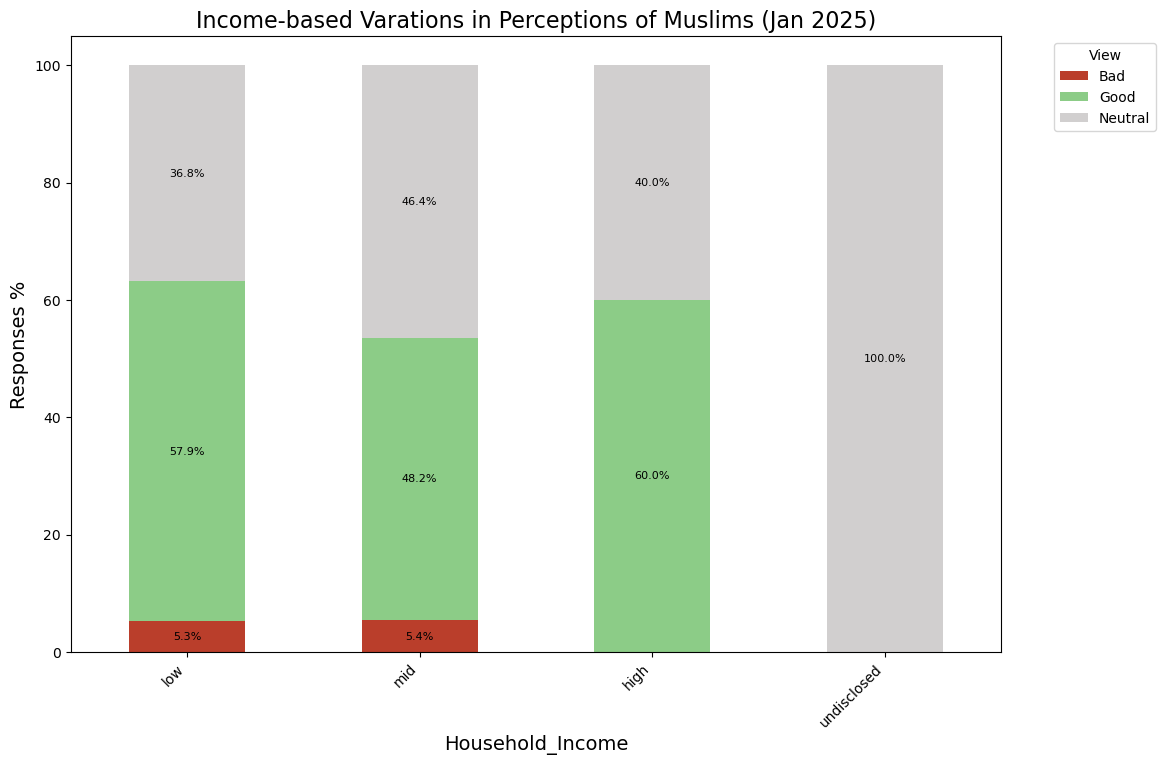

In [184]:
order = ['low','mid','high', 'undisclosed']

plot_income(
    df=jan25, 
    title='Income-based Varations in Perceptions of Muslims (Jan 2025)',
    xlabel='Household_Income',
    ylabel='Responses %',
    cat_col='Household_Income',
    sent_col='How do you feel about Muslim people in America?',
    cat_order=order
)

As of January 2025, all but two income groups (25k–49k and 50k–74k) express predominantly positive or neutral sentiments about Muslims. This represents a significant improvement compared to October 2024, when seven income groups held some level of negative sentiment. Groups such as 0k–9k, 175k–199k, and undisclosed, which previously exhibited neutrality or mild negativity, now show no negative views.

While the 25k–49k and 50k–74k groups still display some negativity, the overall shift toward positivity and neutrality across most income groups highlights a notable change in perceptions over time.

# Regional Differences in Perceptions Of Muslims

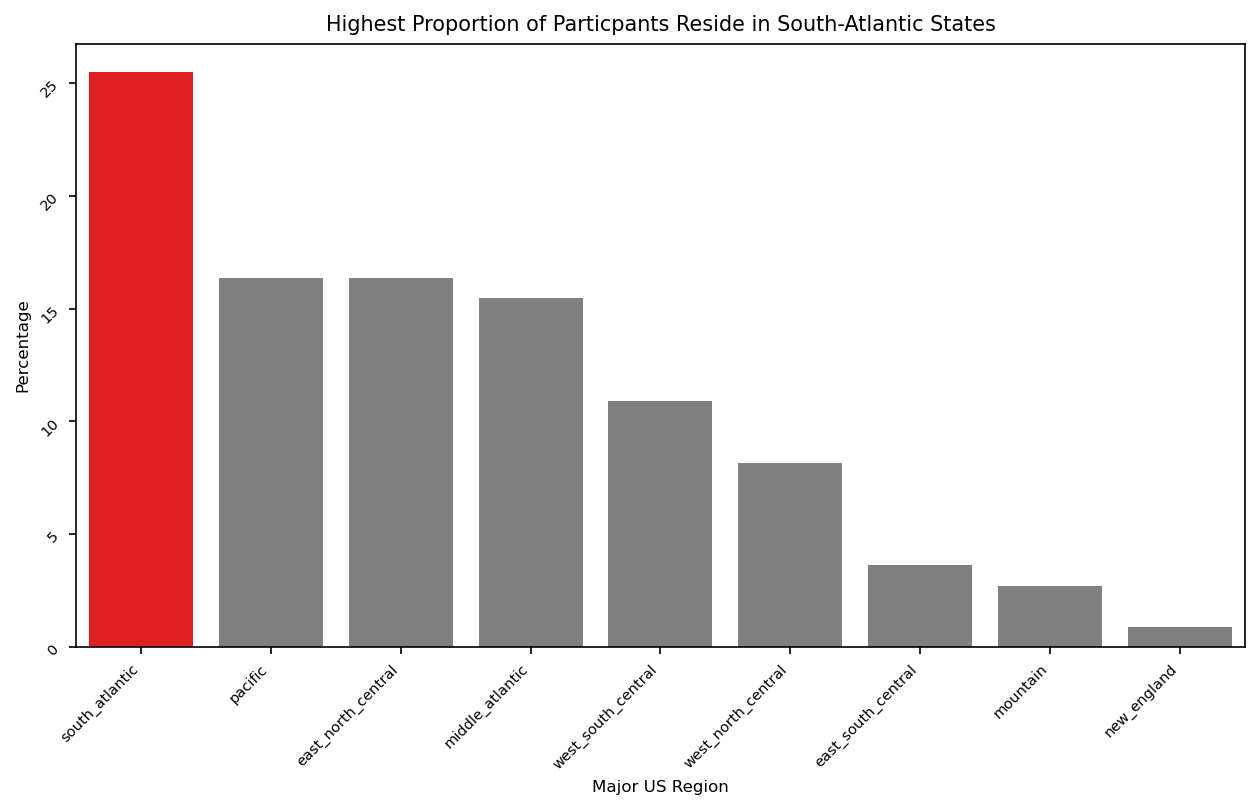

In [43]:
plot_percentages(jan25,'Major US Region', 'Major US Region',
                 'Highest Proportion of Particpants Reside in South-Atlantic States')

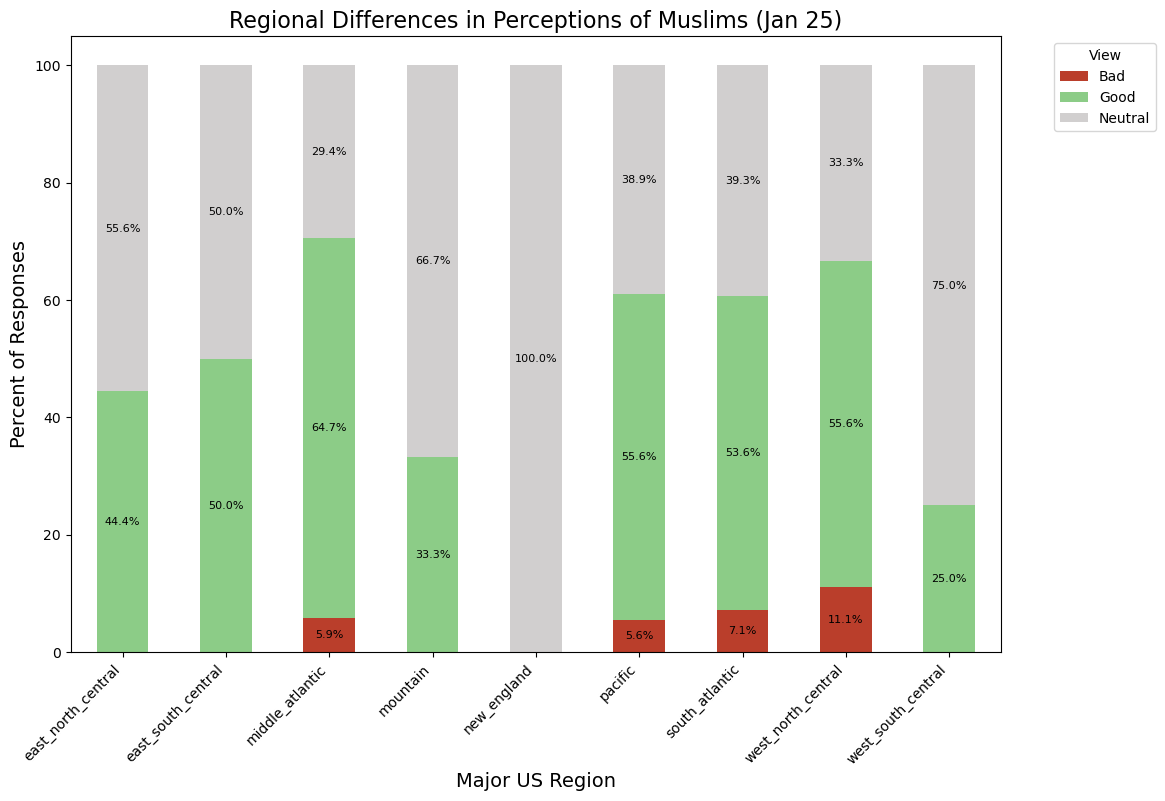

<Figure size 7200x4000 with 0 Axes>

In [44]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Regional Differences in Perceptions of Muslims (Jan 25)',
    xlabel='Major US Region',
    ylabel='Percent of Responses',
    cat_col='Major US Region',
    sent_col='How do you feel about Muslim people in America?'
)


The data reflects an overall decline in negative sentiment and an increase in neutrality across most regions.
Positive perceptions remain strong but have slightly declined in some regions, possibly due to shifts toward neutral stances.
Regional disparities persist, with some areas (e.g., West North Central) showing increasing negativity, contrasting with improvements in other regions like New England.

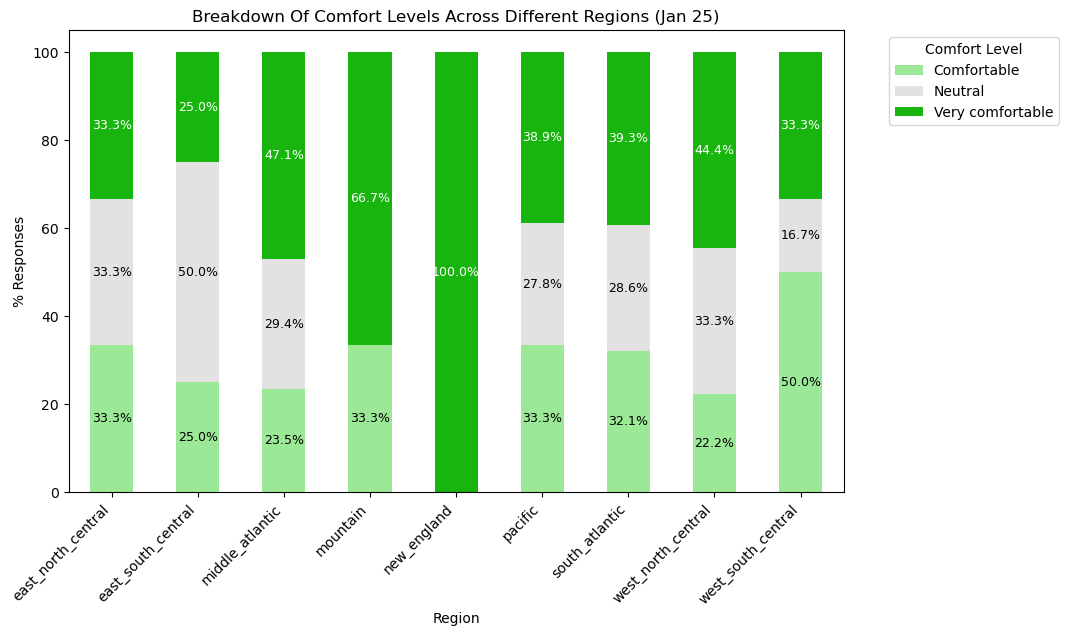

In [45]:
plot_comfort(
    df= jan25, 
    category_col= 'Major US Region',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Regions (Jan 25)',
    xlabel='Region',
    ylabel='% Responses',
)

# Relationship Between Knowing a Muslim and Sentiment

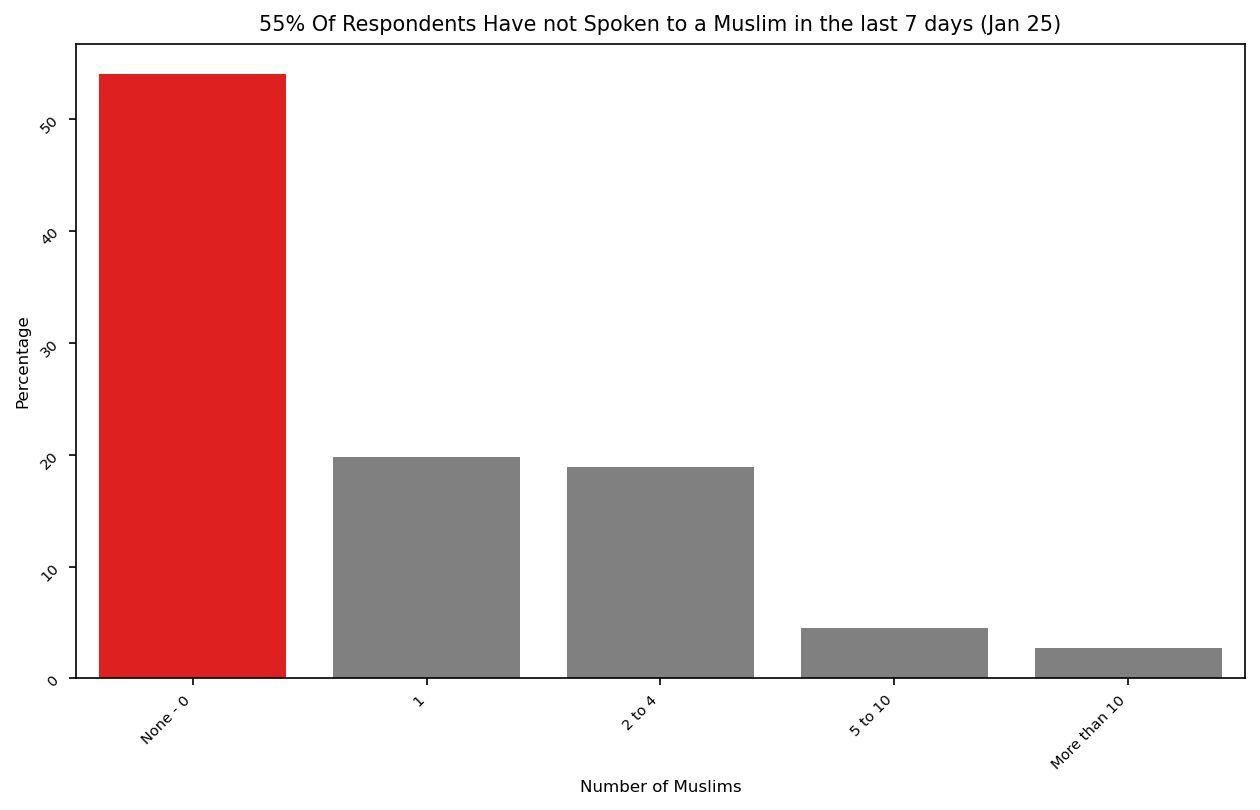

In [46]:
plot_percentages(jan25,'How many muslim people have you talked to in the last 7 days?', 'Number of Muslims',\
           '55% Of Respondents Have not Spoken to a Muslim in the last 7 days (Jan 25)')

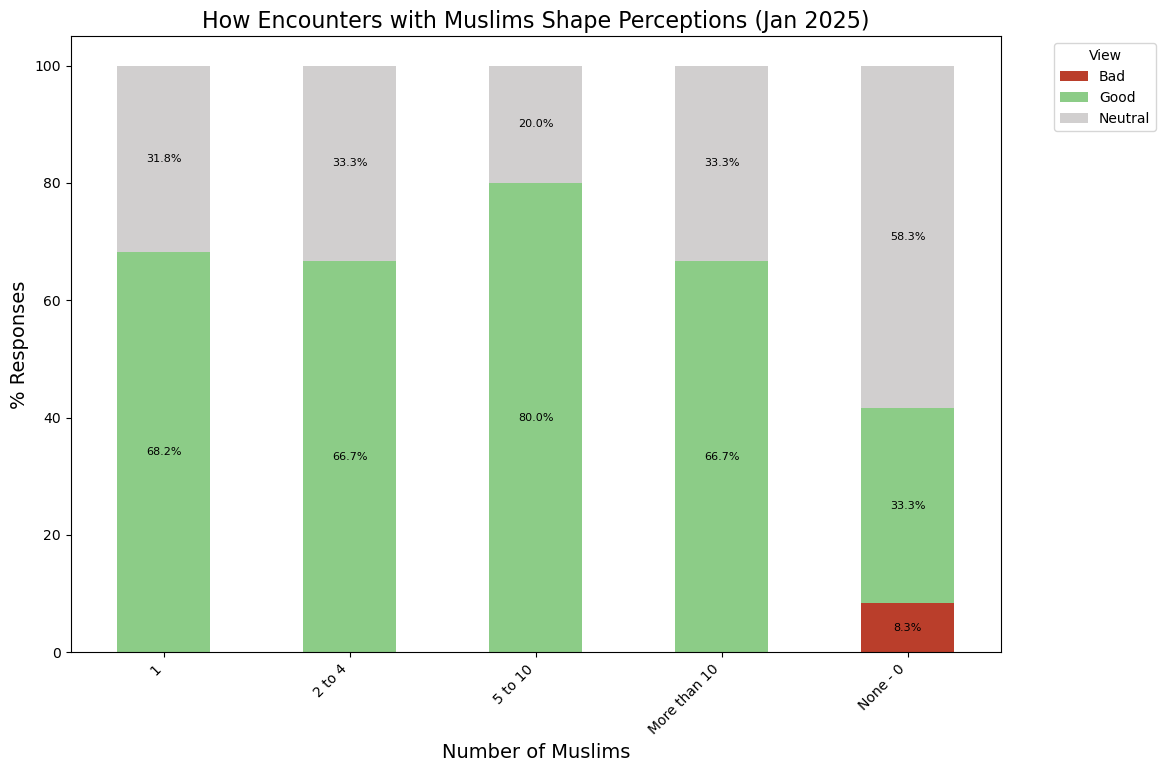

<Figure size 7200x4000 with 0 Axes>

In [47]:
plot_stacked_bar_chart(
    df=jan25, 
    title='How Encounters with Muslims Shape Perceptions (Jan 2025)',
    xlabel='Number of Muslims',
    ylabel='% Responses',
    cat_col='How many muslim people have you talked to in the last 7 days?',
    sent_col='How do you feel about Muslim people in America?'
)

In [191]:
jan25.columns

Index(['What is your religion?', 'Religion_other',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income',
       'Household_Income'],
      dtype='object')

In [192]:
cat_col= 'How many muslim people have you talked to in the last 7 days?'
sent_col= 'How do you feel about Muslim people in America?'
grouped = jan25.groupby([cat_col, sent_col]).size().unstack(fill_value=0)
    
grouped_percentage_jan = grouped.div(grouped.sum(axis=1), axis=0) * 100

In [193]:
grouped_percentage_jan

How do you feel about Muslim people in America?,Bad,Good,Neutral
How many muslim people have you talked to in the last 7 days?,,,
1,0.000000,68.181818,31.818182
2 to 4,0.000000,66.666667,33.333333
5 to 10,0.000000,80.000000,20.000000
More than 10,0.000000,66.666667,33.333333
None - 0,8.333333,33.333333,58.333333


Those who have interacted with 5 to 10 Muslims report the highest percentage of positive views at 80%.
Other groups with interactions (1, 2–4, or more than 10 Muslims) show similar positive perceptions, ranging from 66.7% to 68.2%.

Positive perceptions are noticeably lower for those who report having had no encounters with Muslims (33.3%). This same group, is the only group that reported having negative views about Muslims

In summary, encounters correlate with positive perceptions- People who have interacted with Muslims are much more likely to report positive views and are less likely to hold negative or neutral views.


In [185]:
jan25.columns

Index(['What is your religion?', 'Religion_other',
       'How many muslim people have you talked to in the last 7 days?',
       'How do you feel about Muslim people in America?',
       'What is your level of education?', 'Where do you get your news from?',
       'News_other',
       'How comfortable do you feel interacting with Muslims in your community?',
       'How often do you hear positive things about Muslims in the media?',
       'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
       'Gender', 'Age', 'Major US Region', 'Device', 'Household Income',
       'Household_Income'],
      dtype='object')

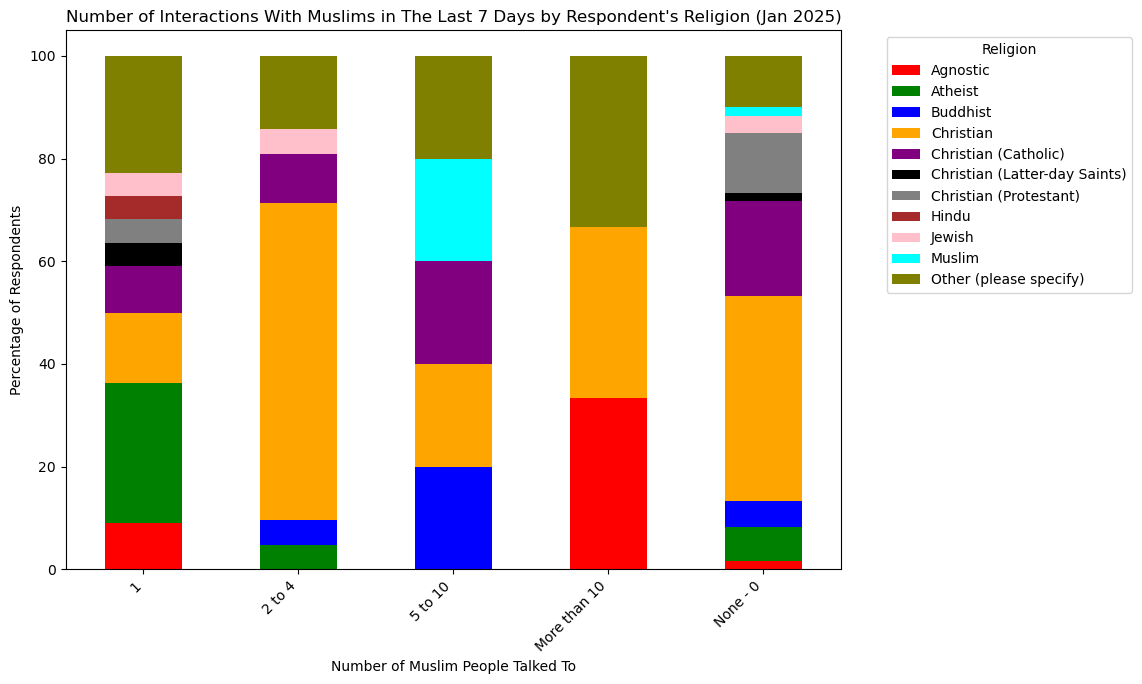

In [189]:
counts = jan25.groupby(['How many muslim people have you talked to in the last 7 days?', 
                        'What is your religion?']).size().unstack()

# Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plotting
percentages.plot(kind='bar', stacked=True, figsize=(10, 7), \
                 color= ['red','green','blue','orange','purple','black','grey','brown','pink','cyan','olive'])

plt.title("Number of Interactions With Muslims in The Last 7 Days by Respondent's Religion (Jan 2025)")
plt.xlabel("Number of Muslim People Talked To")
plt.ylabel("Percentage of Respondents")
plt.xticks(rotation=45, ha='right') 

plt.legend(title="Religion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Relationship Between Primary News Sources and Public Sentiment

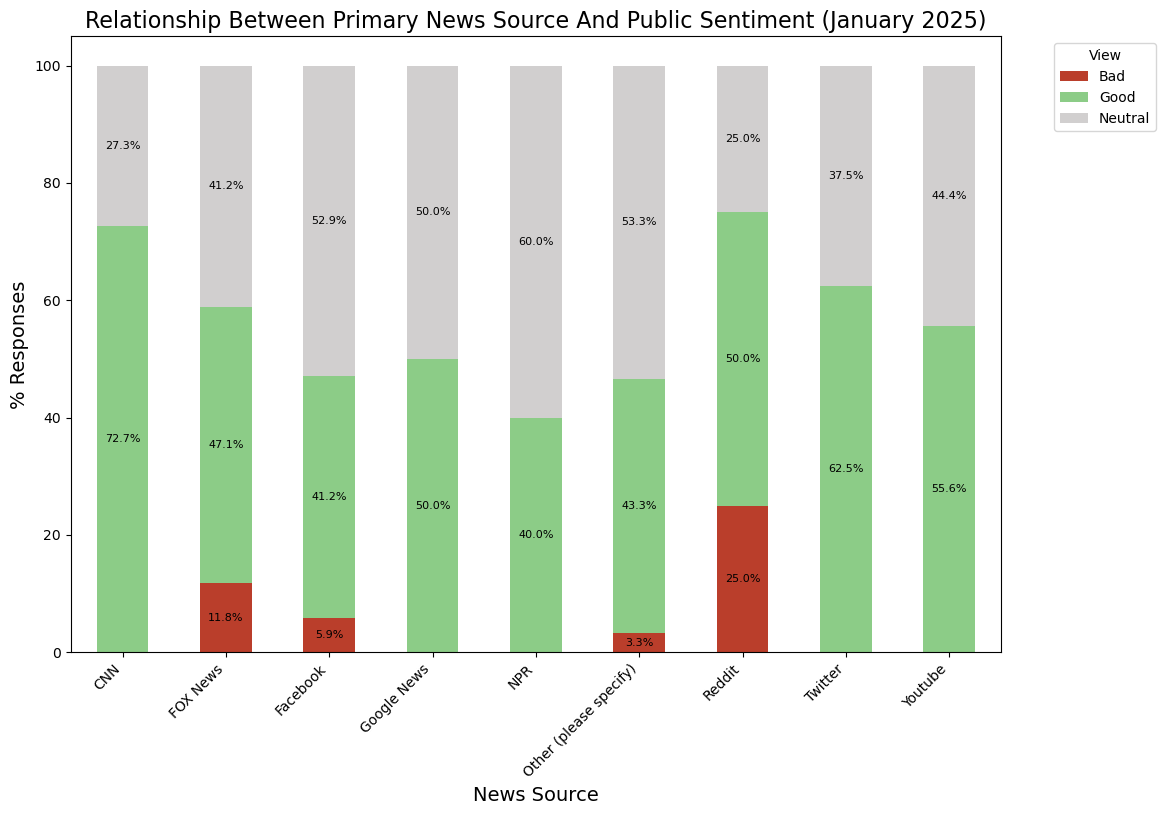

<Figure size 7200x4000 with 0 Axes>

In [48]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Primary News Source And Public Sentiment (January 2025)',
    xlabel='News Source',
    ylabel='% Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

Compared to October 2024, January 2025 saw a decline in overall negative sentiment, with the number of news sources reporting any level of negative views dropping from six to four.

The most significant shift occurred on Reddit, where positive sentiment declined sharply while negative sentiment rose substantially. On the other hand, CNN and NPR demonstrated improved sentiment, with increased positive perceptions and reduced negative views. These trends reflect a general movement toward more positive or neutral attitudes across most news sources.



In [49]:
jan25[jan25['Where do you get your news from?']== 'Other (please specify)']['News_other']

4                                            Researching
11                                                TikTok
14                                                   NBC
15                                              Local tv
17                                    I don't watch news
19           I don’t “get” news. I don’t watch any news.
22     The ones who tell the TRUTH. Chad Prather is g...
31     Local, State Michigan, NPR, Fox News, CNN, Fac...
33                                            Apple news
34                                               ap news
39                                       Various sources
42                                               Newsmax
46                                    Local news channel
47                         mixure of above. check all TV
49                                           Ground News
52                 Local news channels, articles, tiktok
56                                                tiktok
57                             

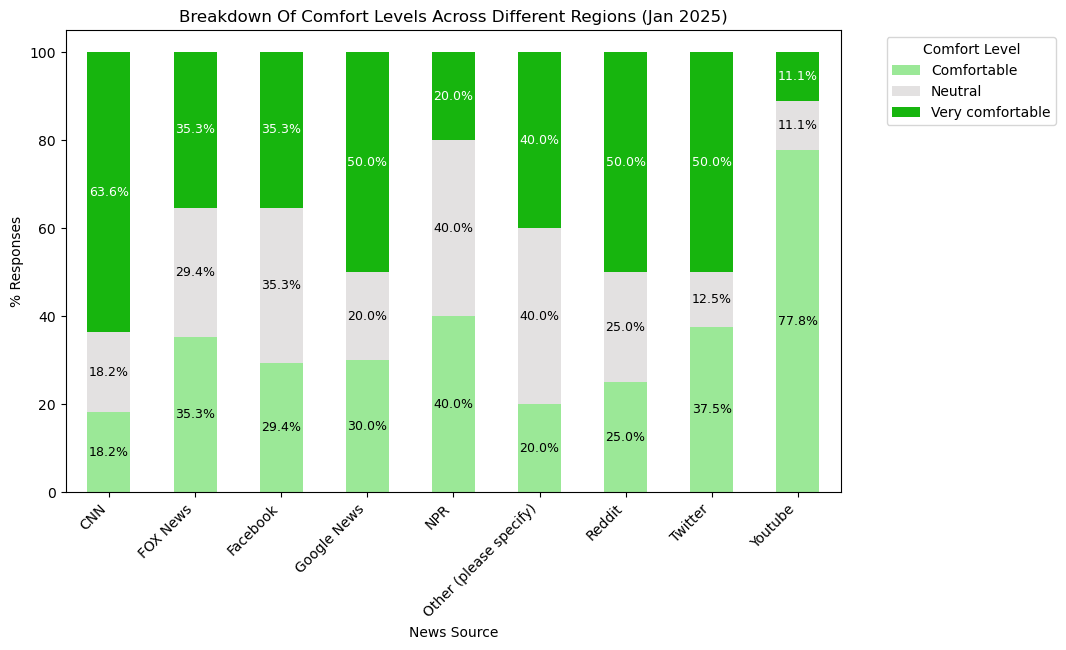

In [50]:
plot_comfort(
    df= jan25, 
    category_col= 'Where do you get your news from?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Regions (Jan 2025)',
    xlabel='News Source',
    ylabel='% Responses',
)

There is a noticeable increase in neutral sentiment across most news platforms

# Relationship Between Exposure to Positive Portrayal and Overall Sentiment

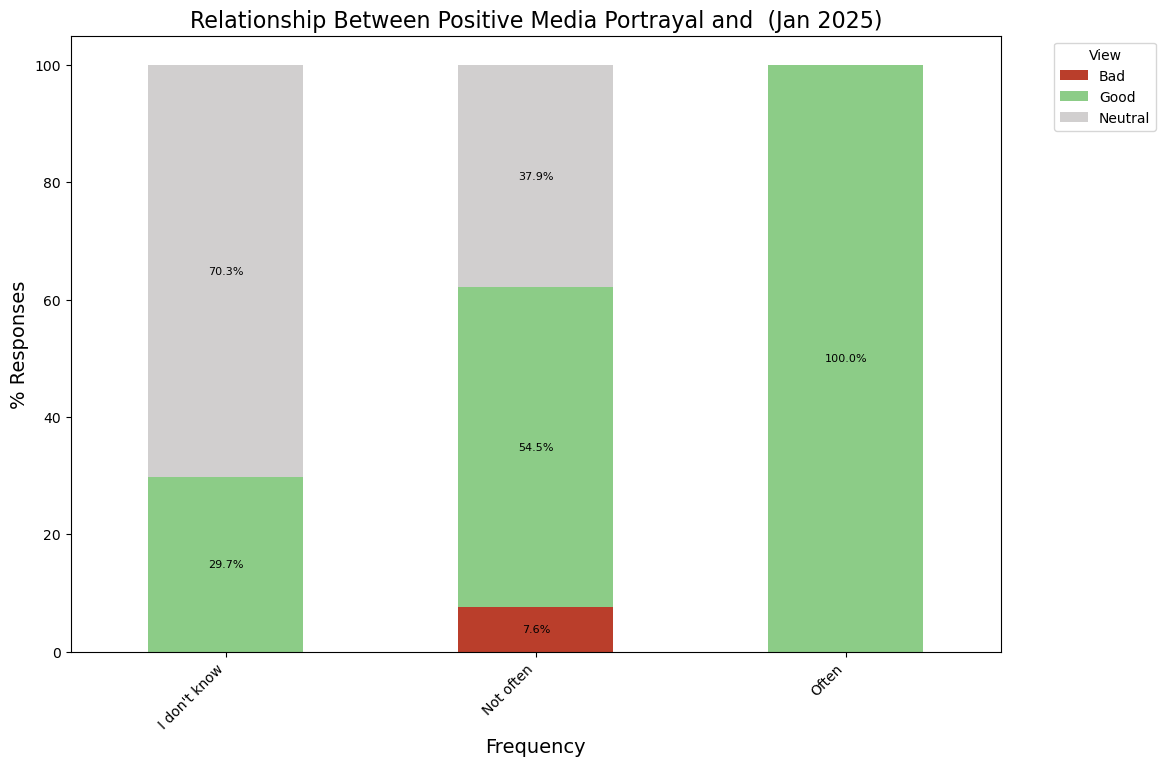

<Figure size 7200x4000 with 0 Axes>

In [195]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Positive Media Portrayal and  (Jan 2025)',
    xlabel='Frequency',
    ylabel='% Responses',
    cat_col= 'How often do you hear positive things about Muslims in the media?',
    sent_col='How do you feel about Muslim people in America?'
)

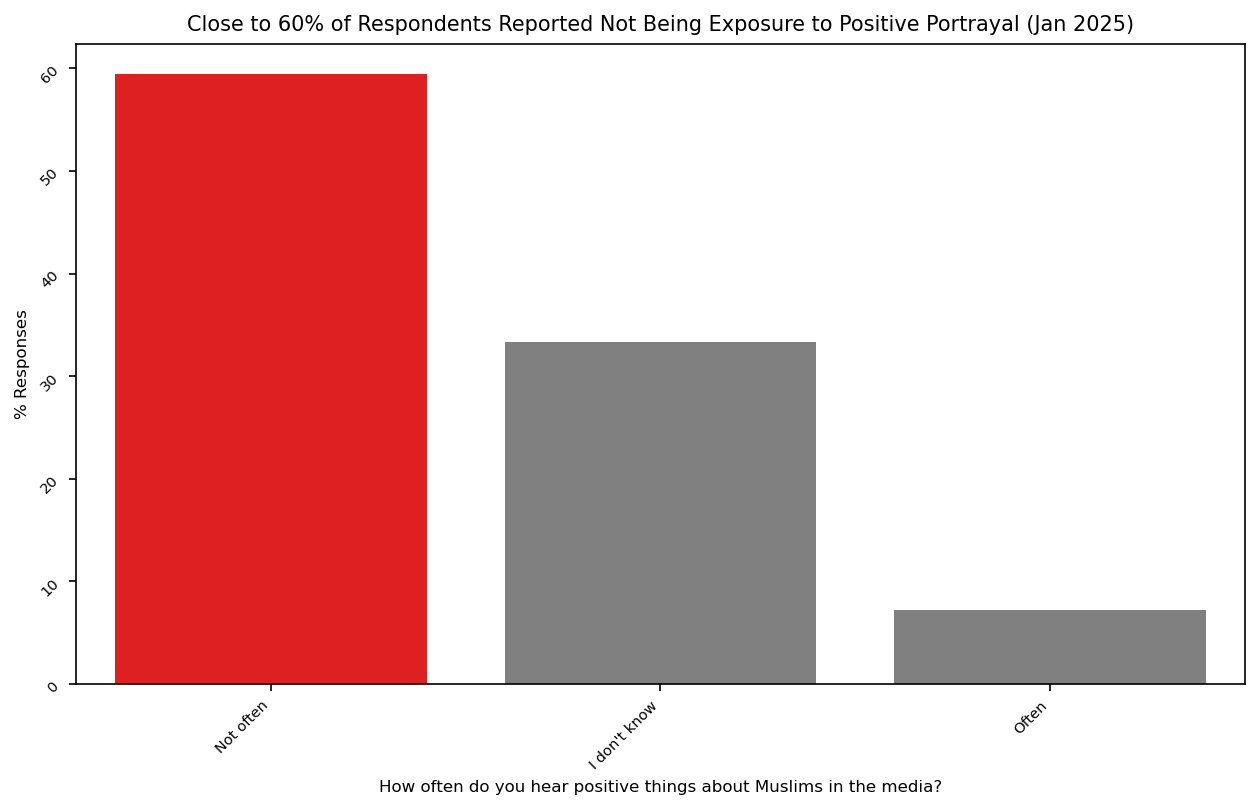

In [197]:
plot_percentages(jan25,'How often do you hear positive things about Muslims in the media?', 'How often do you hear positive things about Muslims in the media?',
           'Close to 60% of Respondents Reported Not Being Exposure to Positive Portrayal (Jan 2025)')

# Relationship between Gender and Sentiment

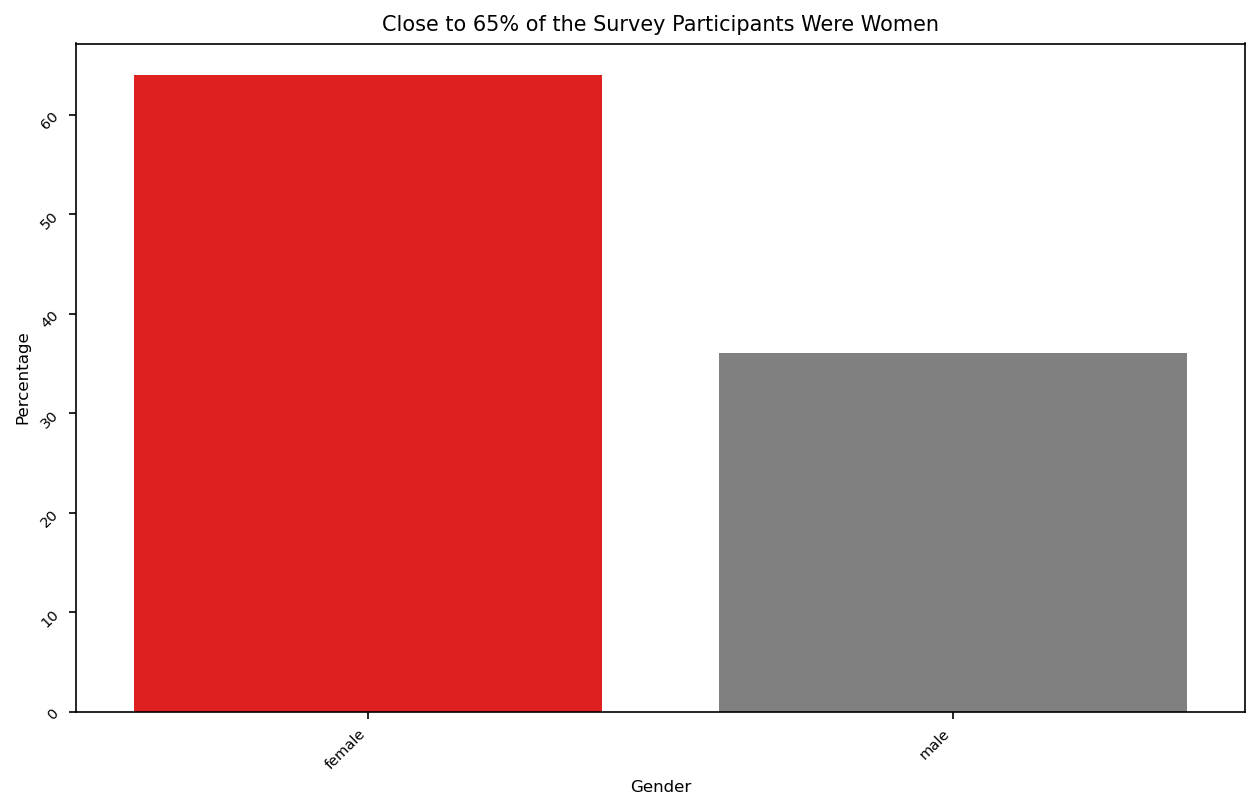

In [51]:
plot_percentages(jan25,'Gender', 'Gender',
           'Close to 65% of the Survey Participants Were Women')

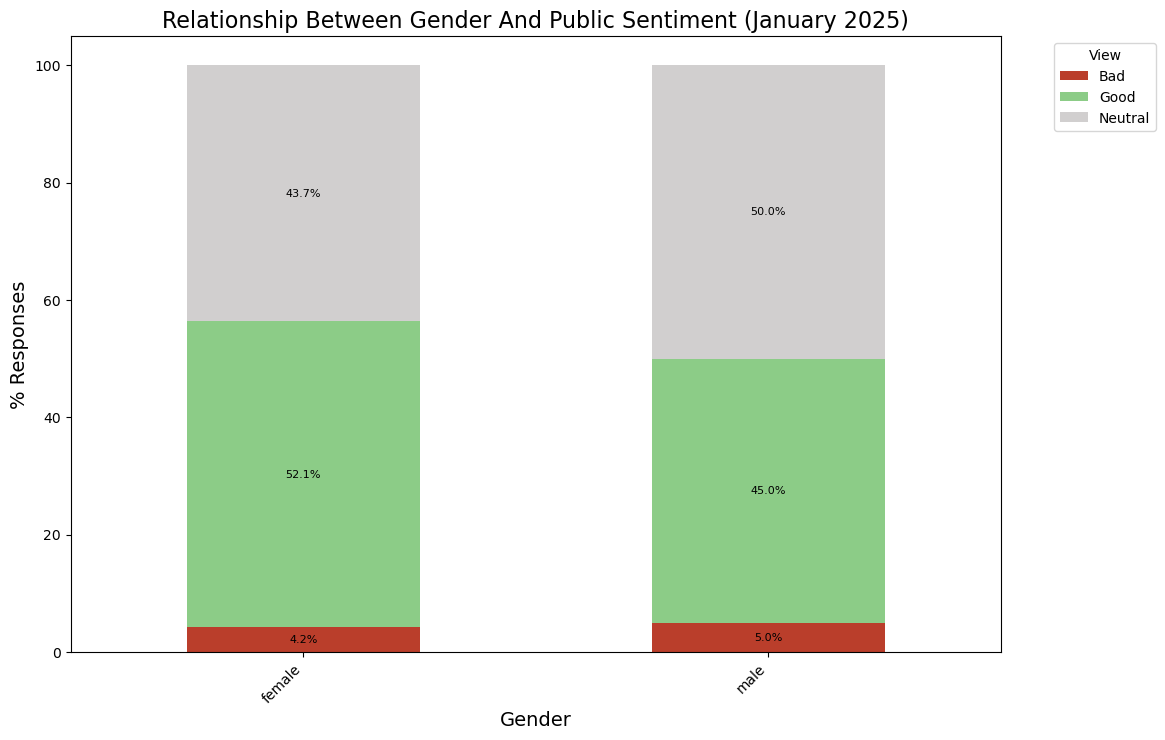

<Figure size 7200x4000 with 0 Axes>

In [52]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Gender And Public Sentiment (January 2025)',
    xlabel='Gender',
    ylabel='% Responses',
    cat_col= 'Gender',
    sent_col='How do you feel about Muslim people in America?'
)

The largest change between October 24 to January 2025 is observed in males, with a significant shift from positive to neutral sentiment. Female sentiments, on the other hand, showed consistency with no substantial shifts over time.

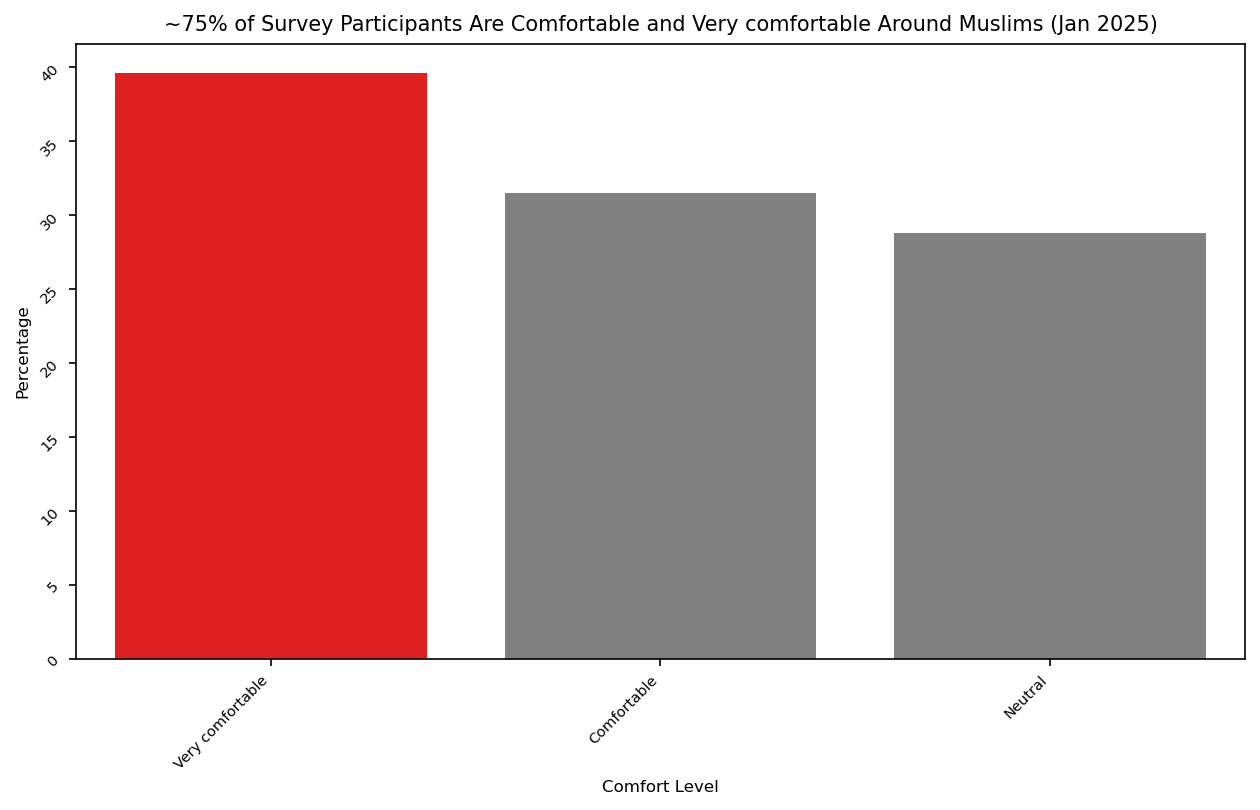

In [53]:
plot_percentages(jan25, 'How comfortable do you feel interacting with Muslims in your community?', \
                 'Comfort Level', '~75% of Survey Participants Are Comfortable and Very comfortable Around Muslims (Jan 2025)')

The overall level of comfort remained consistent between October 2024 and January 2025, indicating stability in positive sentiments. Notably, the absence of discomfort persisted in January 2025, reflecting a continued lack of negative perceptions during this period.

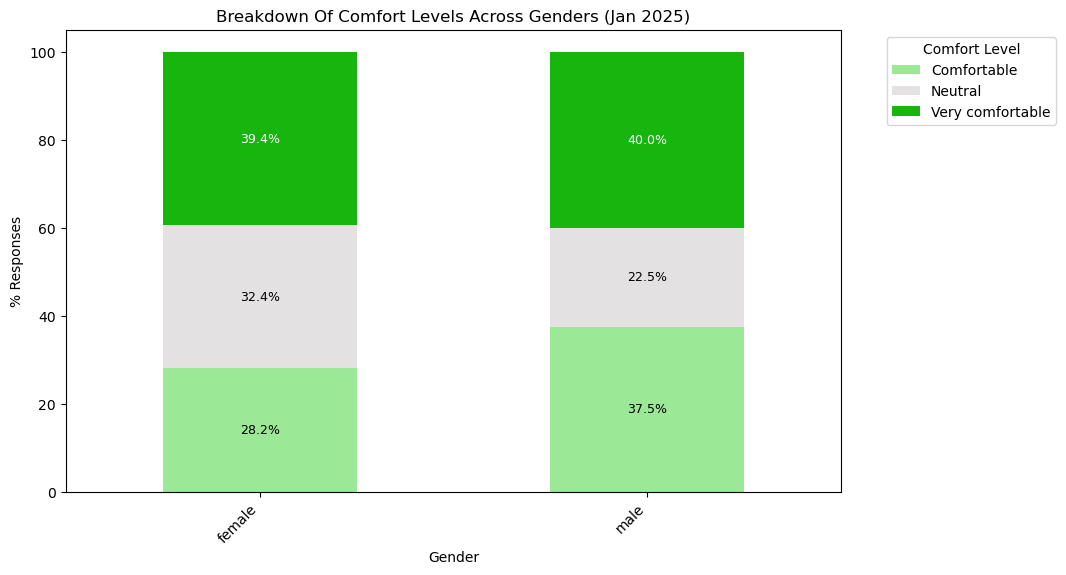

In [54]:
plot_comfort(
    df= jan25, 
    category_col= 'Gender',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Genders (Jan 2025)',
    xlabel='Gender',
    ylabel='% Responses',
)

There is a noticeable decline in high levels of comfort among males, as expressed in the "Very Comfortable" category, with sentiment shifting primarily toward "Comfortable" and "Neutral".
For females, sentiment remains largely consistent with October 2024, apart from a slight 3 percentage point increase in the "Neutral" category.

# Exposure to Positive Portrayals of Muslims in the Media

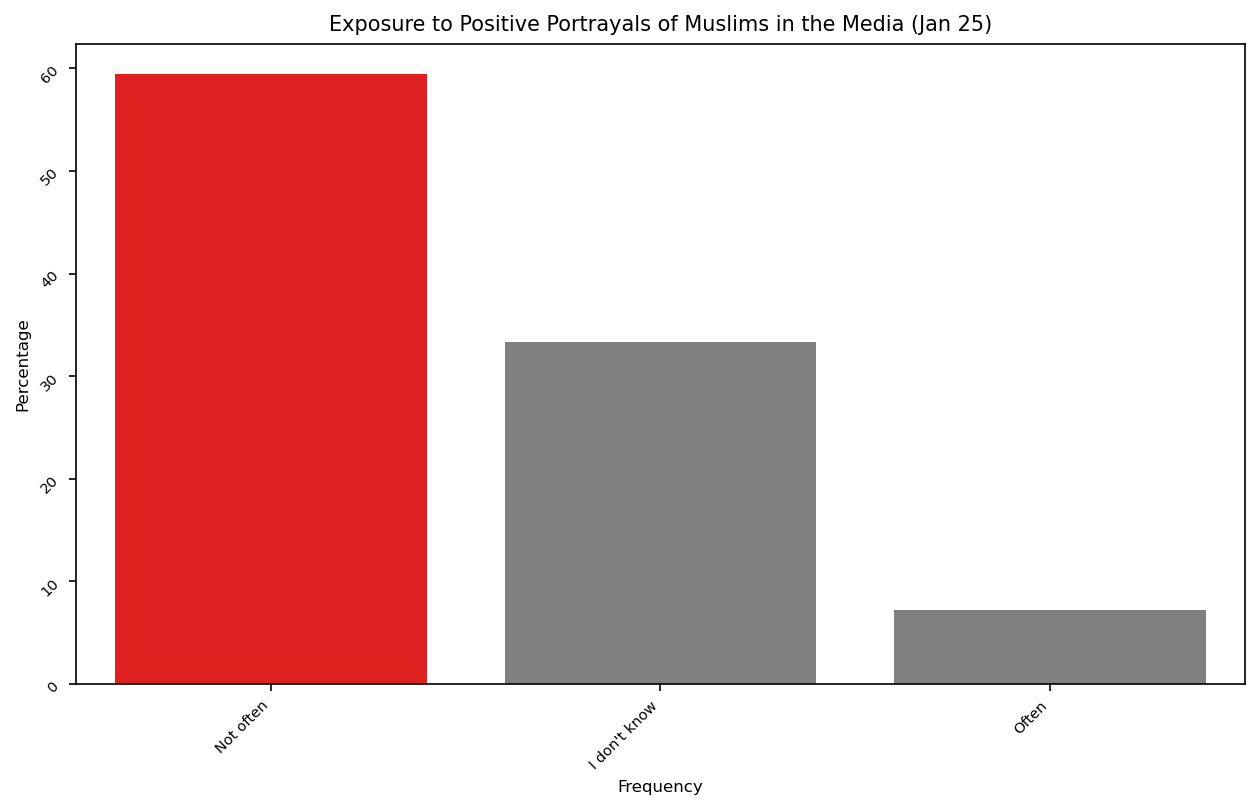

In [55]:
plot_percentages(jan25, 'How often do you hear positive things about Muslims in the media?', 'Frequency',\
                  'Exposure to Positive Portrayals of Muslims in the Media (Jan 25)' )

From October 2024 to January 2025, fewer people said they often saw positive portrayals of Muslims in the media. More people also said they weren’t sure, which may mean that positive coverage became less clear or memorable during that time.

In [56]:
def plot_exposure(df, category_col, exposure_level, title, xlabel, ylabel):   
    grouped = df.groupby([category_col, exposure_level]).size().reset_index(name='count')
    totals = grouped.groupby(category_col)['count'].transform('sum')
    grouped['percentage'] = (grouped['count'] / totals) * 100

    pivot_table = grouped.pivot(index=category_col, columns=exposure_level, values='percentage').fillna(0)

    exposure_colors = {
        'Often': '#17b50e',            
        'Not Often': '#cf4229',     
        "I don't know": '#9db0f2' 
    }

    ax = pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), 
                          color=[exposure_colors.get(level, '#cccccc') for level in pivot_table.columns])


    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Exposure Level', bbox_to_anchor=(1.05, 1), loc='upper left')

    for i, category in enumerate(pivot_table.index):
        cumulative_percentage = 0
        for level in pivot_table.columns:
            percentage = pivot_table.loc[category, level]
            if percentage > 0:
                ax.text(
                    i, cumulative_percentage + (percentage / 2),  # Position in the middle of each segment
                    f"{percentage:.1f}%", 
                    ha='center', va='center', color='white' if level == 'Often' else 'black', fontsize=9
                )
                cumulative_percentage += percentage
    plt.figure(figsize=(9, 5), dpi=400)
    plt.show()

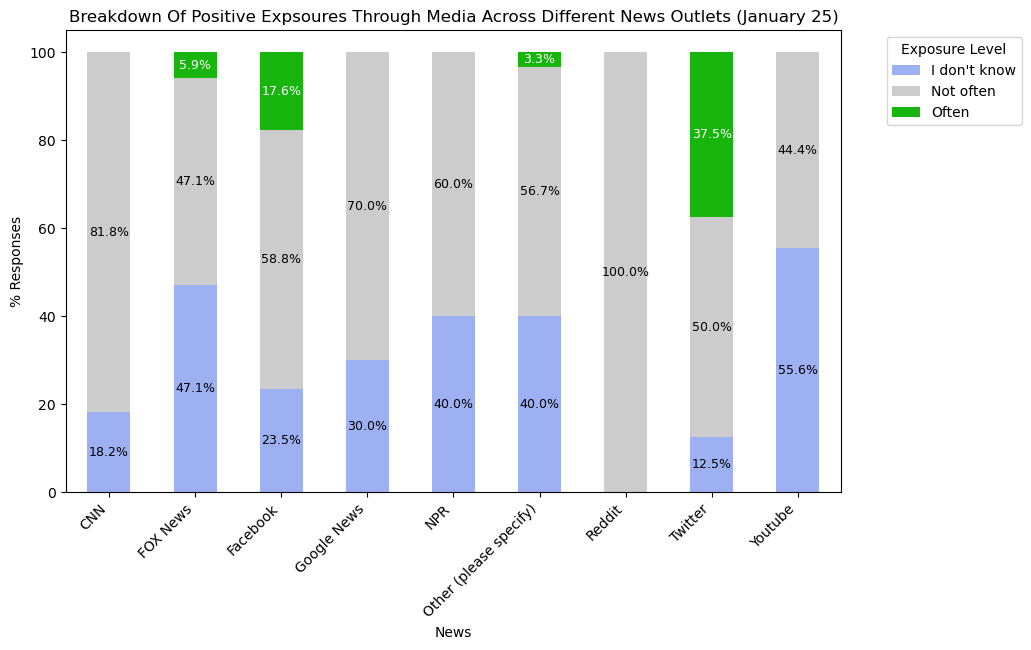

<Figure size 3600x2000 with 0 Axes>

In [70]:
plot_exposure(
    df= jan25, 
    category_col= 'Where do you get your news from?',
    exposure_level = 'How often do you hear positive things about Muslims in the media?',
    title='Breakdown Of Positive Expsoures Through Media Across Different News Outlets (January 25)',
    xlabel='News',
    ylabel='% Responses',
)

When analyzing positive exposures to Muslims through different news outlets, there is a clear decline in the number of news sources perceived as reporting positive stories about Muslims, as indicated by respondents. The most significant drop is observed with Facebook, where 62% of respondents reported seeing positive portrayals in October 2024, compared to just 17% in January 2025. This highlights a noticeable decline in the perceived frequency of positive narratives about Muslims across various media platforms

# Breakdown of Comfort Levels Across Education

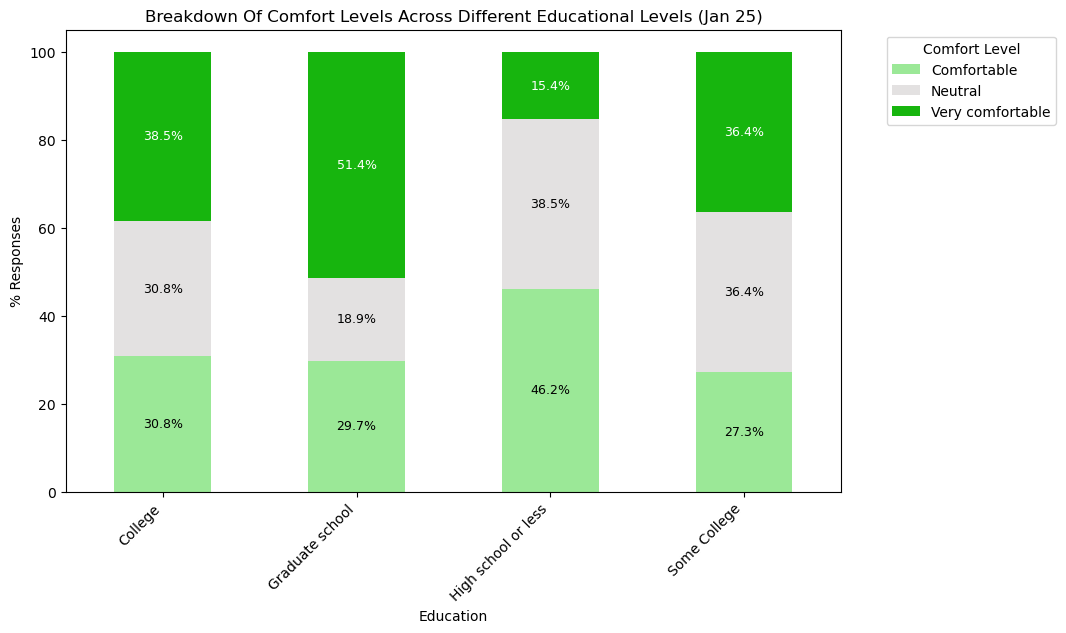

In [58]:
plot_comfort(
    df= jan25, 
    category_col= 'What is your level of education?',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Educational Levels (Jan 25)',
    xlabel='Education',
    ylabel='% Responses',
)

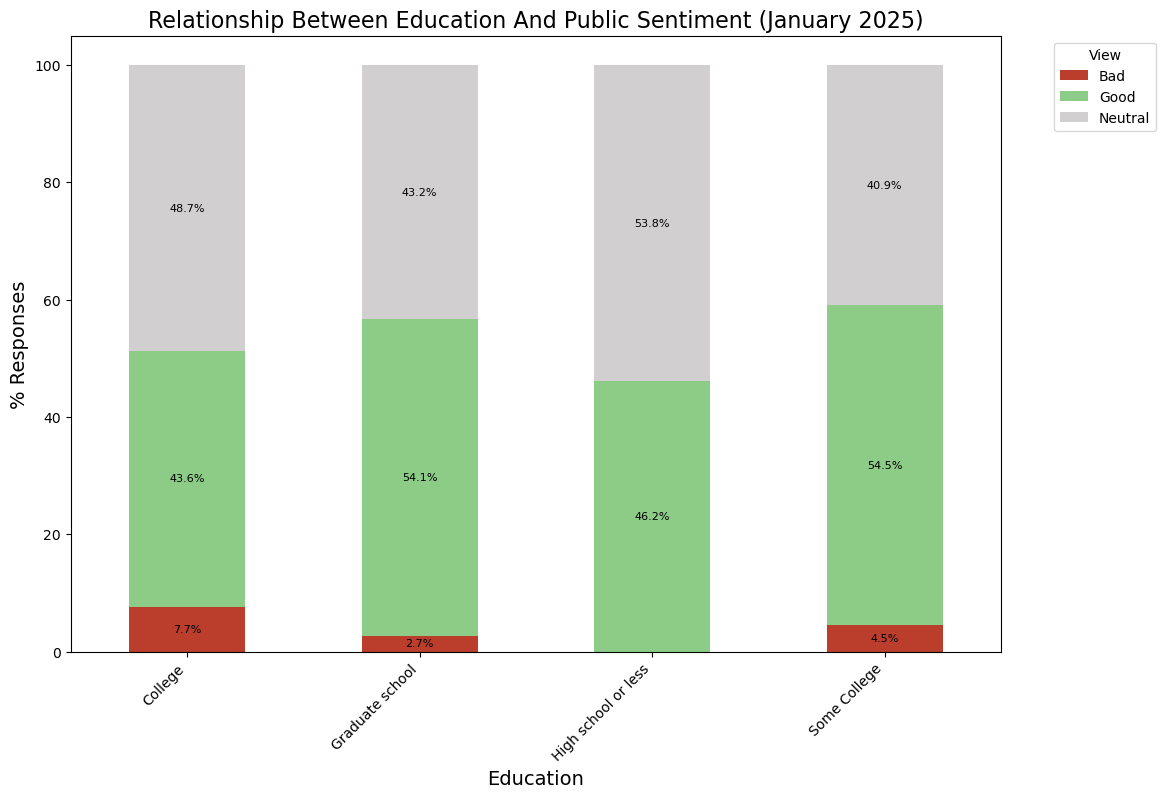

<Figure size 7200x4000 with 0 Axes>

In [59]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Education And Public Sentiment (January 2025)',
    xlabel='Education',
    ylabel='% Responses',
    cat_col= 'What is your level of education?',
    sent_col='How do you feel about Muslim people in America?'
)

Participants with a `High school` or less education exhibited the highest levels of neutral sentiment and the lowest levels of feeling **Very comfortable**. In contrast, those with a `Graduate School` education reported the highest levels of comfort and the lowest levels of neutrality.

Interestingly, when asked about their feelings toward Muslims in America, participants with a `High School or less` education did not express any negative sentiments, although they did record the highest levels of neutrality. On the other hand, college-educated participants reported the highest levels of negative sentiment (7.7%) toward Muslims, and their levels of neutrality were second only to the High School group

# Distribution of Sentiment Across Different Ages

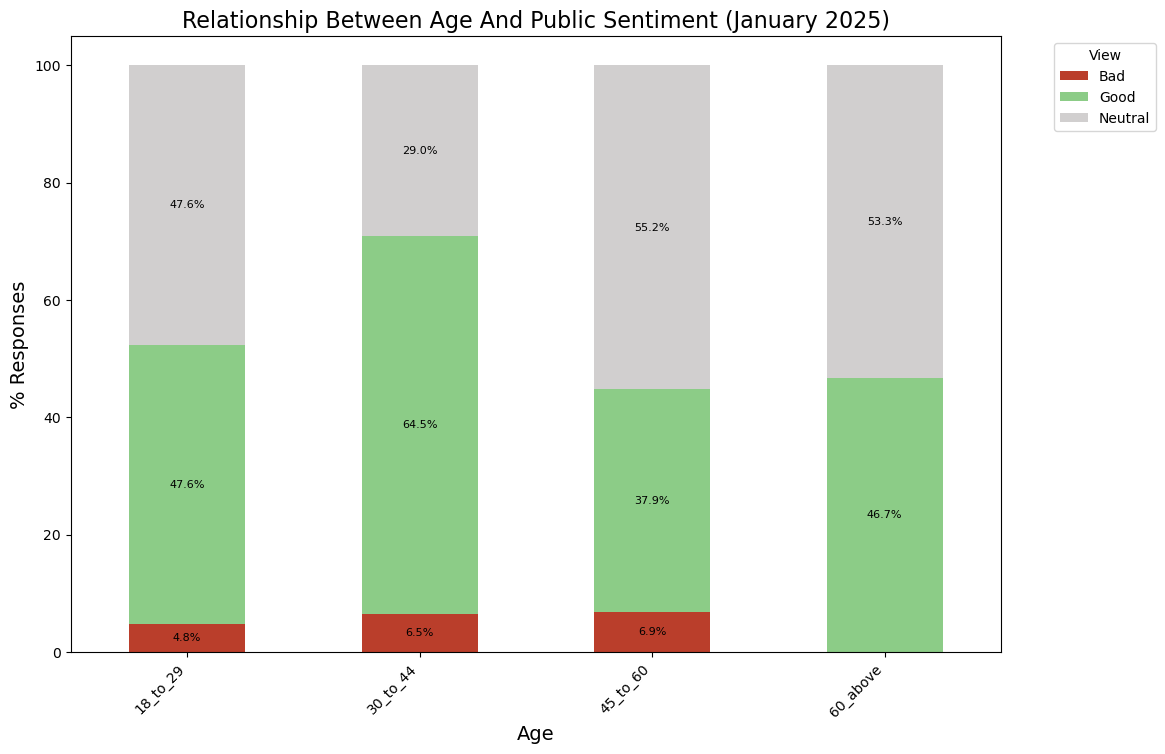

<Figure size 7200x4000 with 0 Axes>

In [60]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Age And Public Sentiment (January 2025)',
    xlabel='Age',
    ylabel='% Responses',
    cat_col= 'Age',
    sent_col='How do you feel about Muslim people in America?'
)

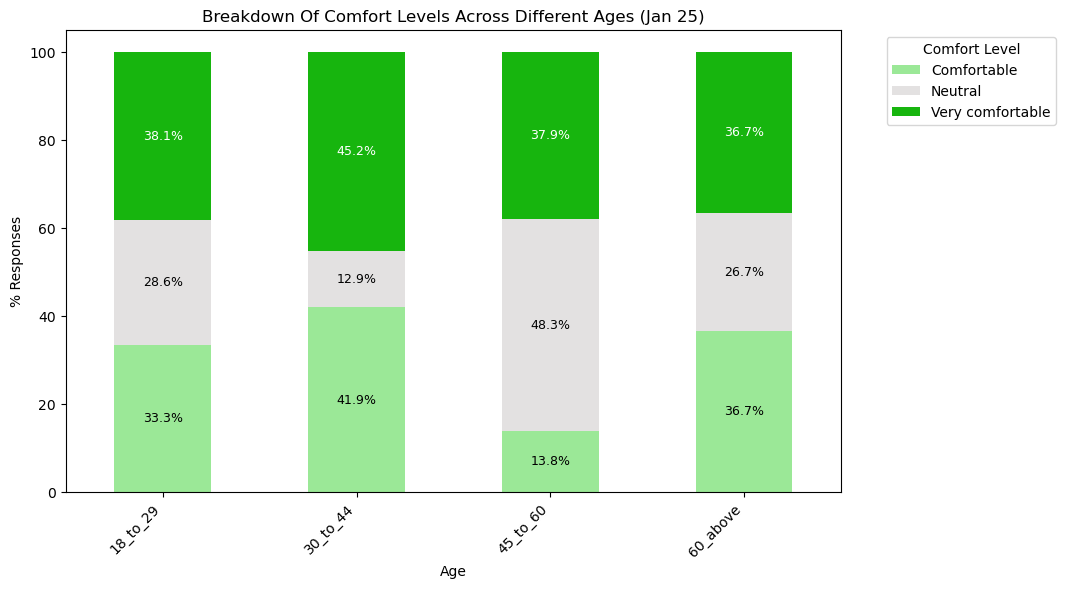

In [61]:
plot_comfort(
    df= jan25, 
    category_col= 'Age',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Different Ages (Jan 25)',
    xlabel='Age',
    ylabel='% Responses',
)

Participants aged `45 to 60` expressed the most negative or ambivalent views toward Muslims. This age group not only reported the highest level of negative sentiment (6.9%) but also recorded the highest level of neutrality (48.3%) regarding their comfort levels with Muslims

# Distribution of Sentiment Across Different Income Groups

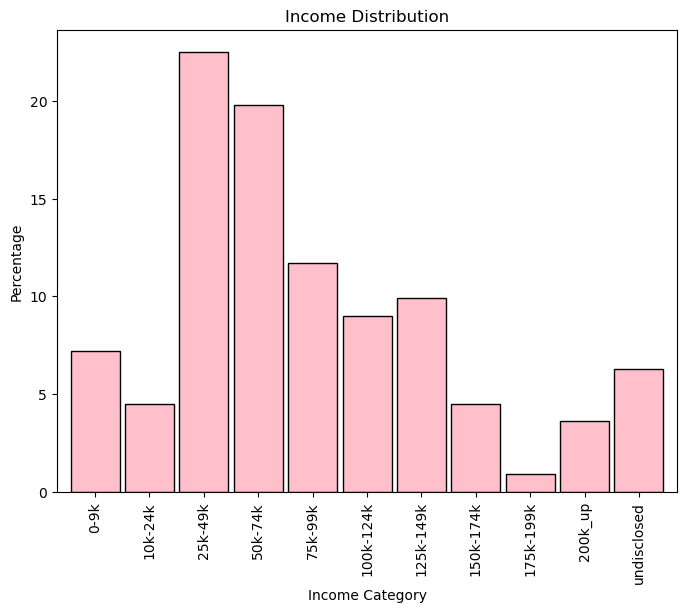

In [62]:
income_percentages = jan25['Household Income'].value_counts(normalize=True).sort_index() * 100

income_percentages.plot(kind='bar', figsize=(8, 6), color='pink', width= 0.9, edgecolor='black')
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Distribution')
plt.show()

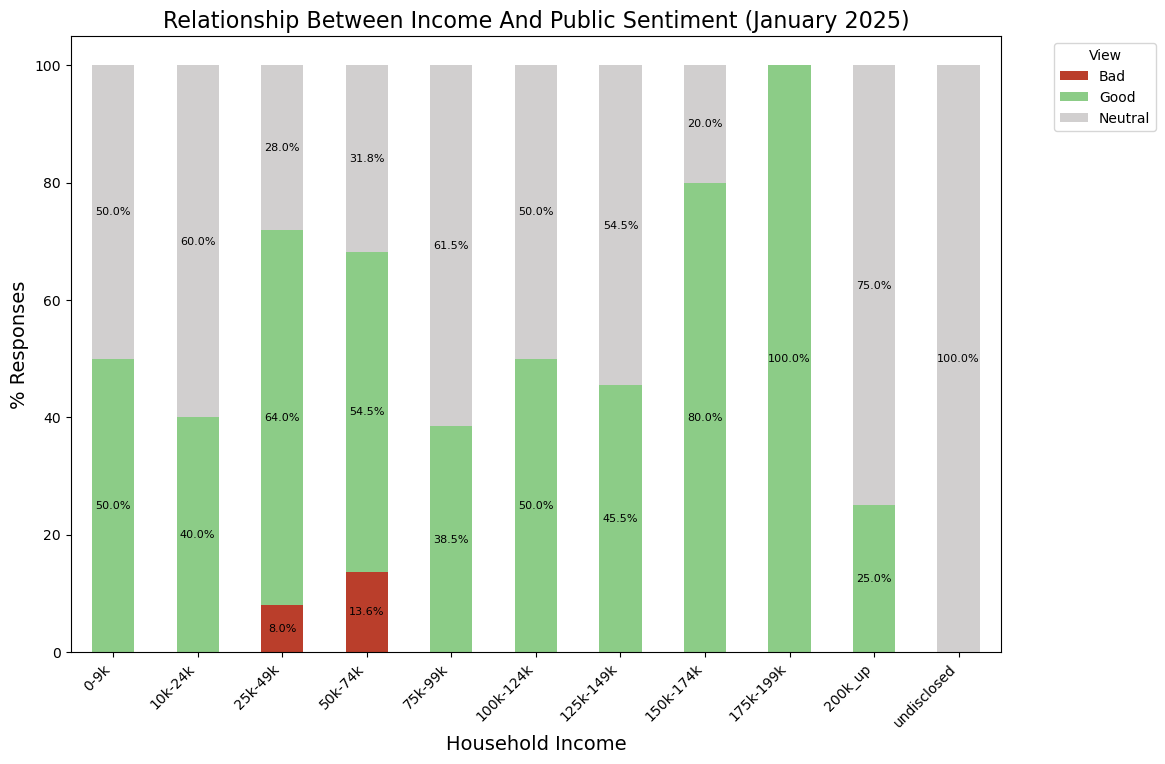

<Figure size 7200x4000 with 0 Axes>

In [63]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Income And Public Sentiment (January 2025)',
    xlabel='Household Income',
    ylabel='% Responses',
    cat_col= 'Household Income',
    sent_col='How do you feel about Muslim people in America?'
)

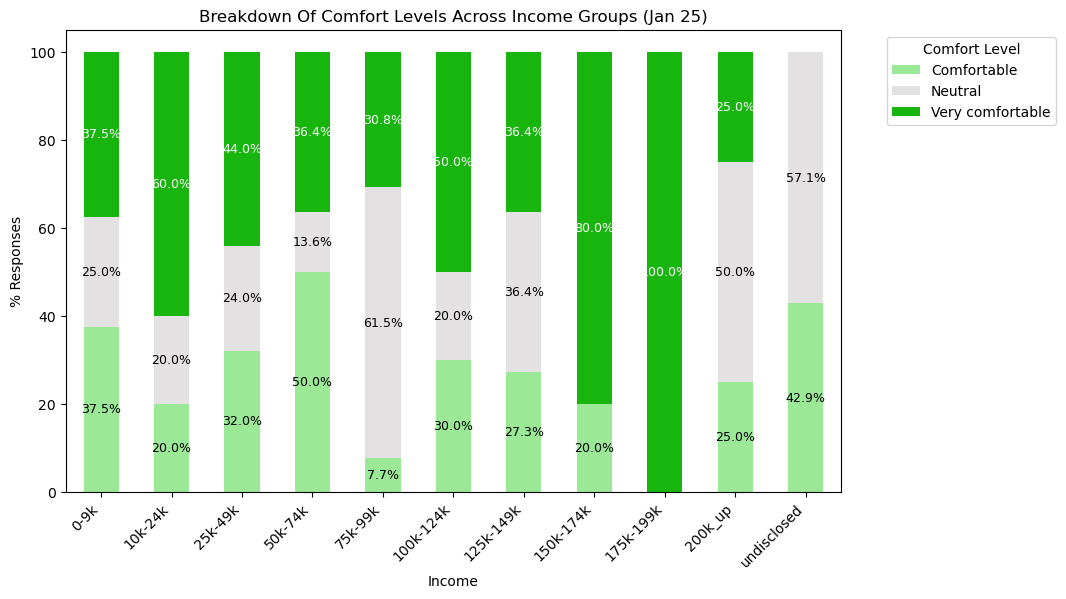

In [64]:
plot_comfort(
    df= jan25, 
    category_col= 'Household Income',
    comfort_level = 'How comfortable do you feel interacting with Muslims in your community?',
    title='Breakdown Of Comfort Levels Across Income Groups (Jan 25)',
    xlabel='Income',
    ylabel='% Responses',
)

Individuals earning 200K and up reported the highest level of neutrality (75%) when asked about their general feelings toward Muslims in America. However, when questioned about their comfort levels around Muslims, the responses were split evenly—50 reported being comfortable or very comfortable, while the remaining 50 expressed neutral comfort levels.

In contrast, the 50K–74K income group exhibited the highest negative sentiment toward Muslims at 13.6 %, yet this same group reported the lowest level of neutrality regarding their comfort levels.

Meanwhile, respondents in the 175K–199K income bracket were uniformly positive, with 100% expressing favorable sentiments about Muslims and 100% feeling very comfortable around them

# Distribution Across News Sources

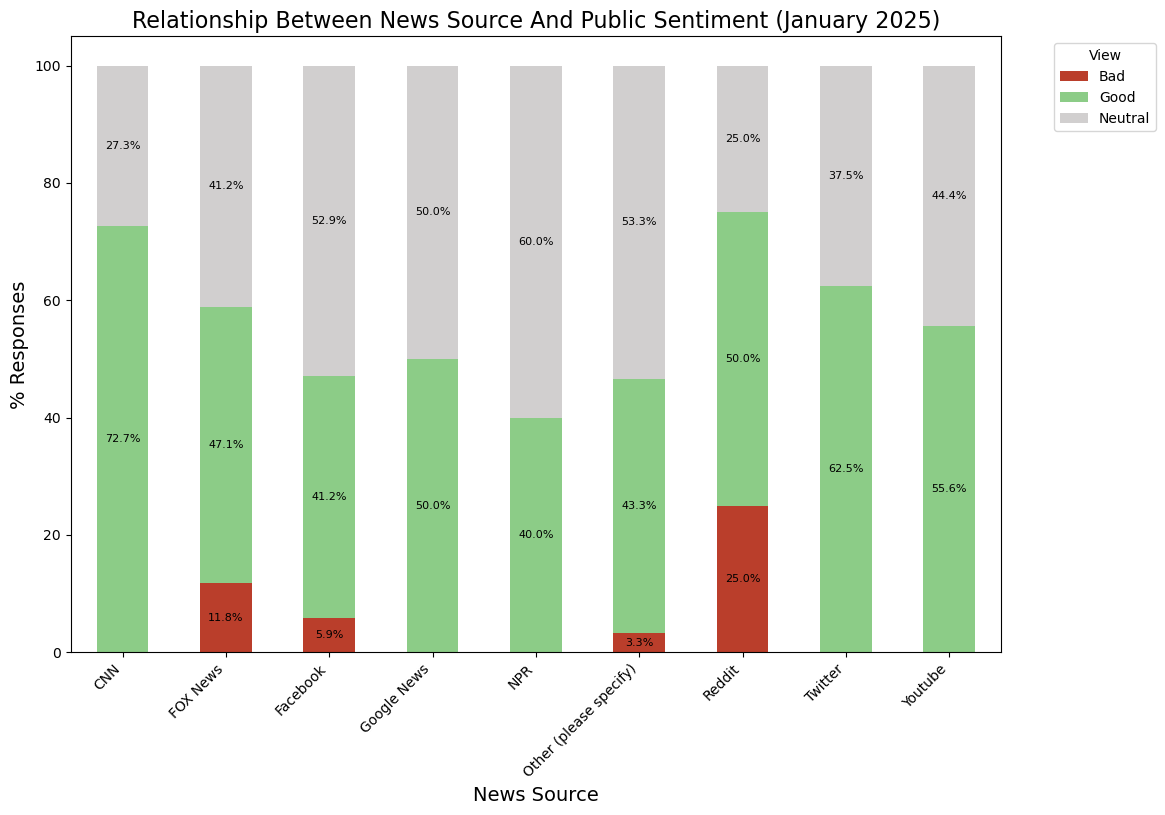

<Figure size 7200x4000 with 0 Axes>

In [65]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between News Source And Public Sentiment (January 2025)',
    xlabel='News Source',
    ylabel='% Responses',
    cat_col= 'Where do you get your news from?',
    sent_col='How do you feel about Muslim people in America?'
)

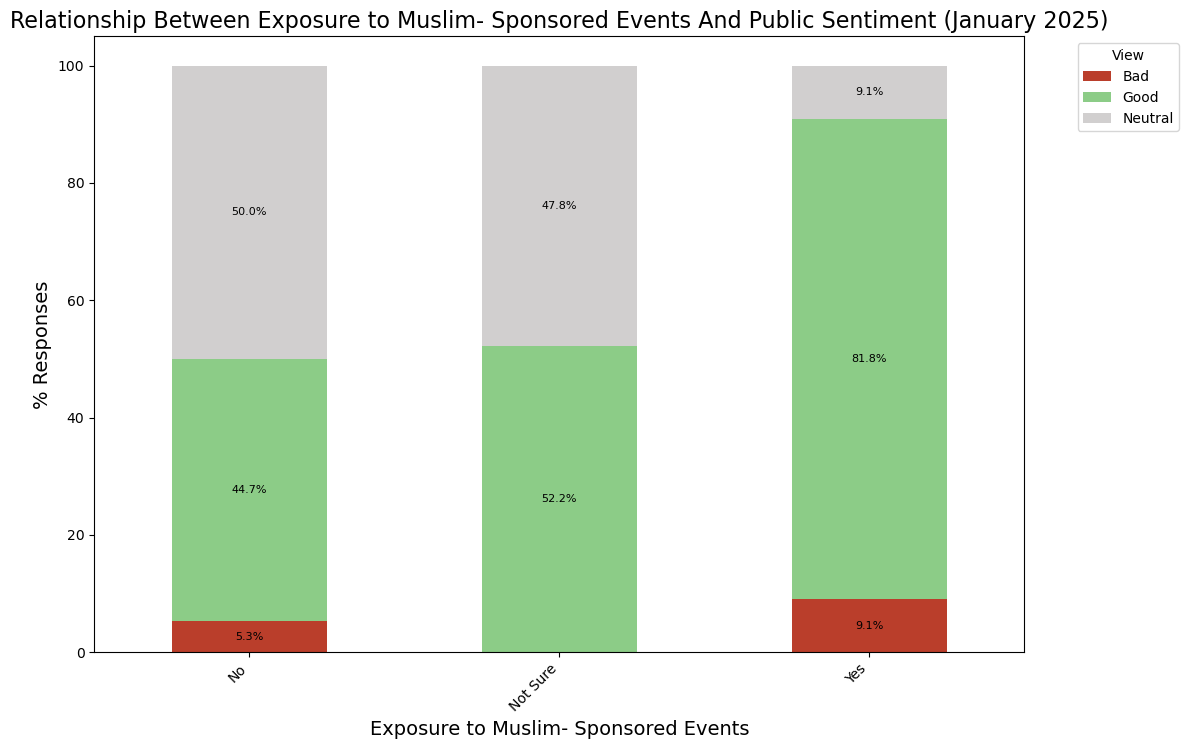

<Figure size 7200x4000 with 0 Axes>

In [73]:
plot_stacked_bar_chart(
    df=jan25, 
    title='Relationship Between Exposure to Muslim- Sponsored Events And Public Sentiment (January 2025)',
    xlabel='Exposure to Muslim- Sponsored Events',
    ylabel='% Responses',
    cat_col= 'In the last 30 days, have you come across any events or activities sponsored by a Muslim person or organization?',
    sent_col='How do you feel about Muslim people in America?'
)

Respondents who have come across events sponsored by Muslims were more likely to express positive views (81.8%) than those who had not. However, this same group also had the highest share of negative sentiment (9.1%) compared to other groups. 
This suggests that while exposure may foster strong positive impressions, it may also provoke more polarized reactions overall.